# Taxon-based precision-recall
This notebook is to demonstrate that taxon-based precision and recall is not suitable for this project

In [1]:
import matplotlib.pyplot as plt
from util import *
from sklearn.metrics import auc

# set path to data folder
root = "F:/Studium/Master/semester5/thesis/data/dataset/"

# definition of the true positive species
species = {
    "Pseudomonas aeruginosa",
    "Escherichia coli",
    "Salmonella enterica",
    "Staphylococcus aureus",
    "Limosilactobacillus fermentum",
    "Enterococcus faecalis",
    "Listeria monocytogenes",
    "Bacillus subtilis",
    "Saccharomyces cerevisiae",
    "Cryptococcus neoformans"}

# total read count in zymoMock dataset
total = 1_160_526
# reading the taxonomic tree
tree = Tree(root + "tree_nr.txt")
# generate dictionary with all taxa that are true positives for each taxonomic rank
true_taxons = get_true_taxons_for_all_ranks(tree, species)

In [3]:
# reading in kraken2 and DIAMER results
data_kraken = read_per_taxon_assignment(root + "zymo_mock/assignment_kraken2x_nr/per_taxon_assignments.tsv")
data_diamer = read_per_taxon_assignment(root + "zymo_mock/assignment_nr_uniform11s_13-mer/per_taxon_assignments.tsv")

# calculate taxon-based precision and recall
data_kraken = get_precision_recall(data_kraken, true_taxons, ignor_cols=["node id", "rank"])
data_diamer = get_precision_recall(data_diamer, true_taxons, ignor_cols=["node id", "rank", "kmers in database"])

data_diamer

,rank,column,cutoff,precision,recall
0,species,kmer count,0,1.0,0.00
1,species,kmer count,40873497,1.0,0.10
2,species,kmer count,32451632,1.0,0.20
3,species,kmer count,15041842,1.0,0.30
4,species,kmer count,13348909,1.0,0.40
...,...,...,...,...,...
4560,phylum,norm. kmer count,0,1.0,0.00
4561,phylum,norm. kmer count,0.069111,1.0,0.25
4562,phylum,norm. kmer count,0.025653,1.0,0.50
4563,phylum,norm. kmer count,0.021014,1.0,0.75


In [4]:
# calculate AUC
data_diamer[data_diamer["rank"] == "species"].groupby(["rank", "column"]).apply(lambda x: auc(x["recall"], x["precision"])).reset_index(name="auc").sort_values("auc", ascending=False)

,rank,column,auc
23,species,OVA (0.60) norm. kmer count (cumulative),0.974343
15,species,OVA (0.40) norm. kmer count (cumulative),0.974343
43,species,OVO (0.10) norm. kmer count (cumulative),0.974343
49,species,OVO (0.30) kmer count (cumulative),0.974343
51,species,OVO (0.30) norm. kmer count (cumulative),0.974343
...,...,...,...
66,species,OVO (0.70) norm. kmer count,0.783313
70,species,OVO (0.80) norm. kmer count,0.779841
74,species,OVO (0.90) norm. kmer count,0.760873
78,species,OVO (1.00) norm. kmer count,0.709240


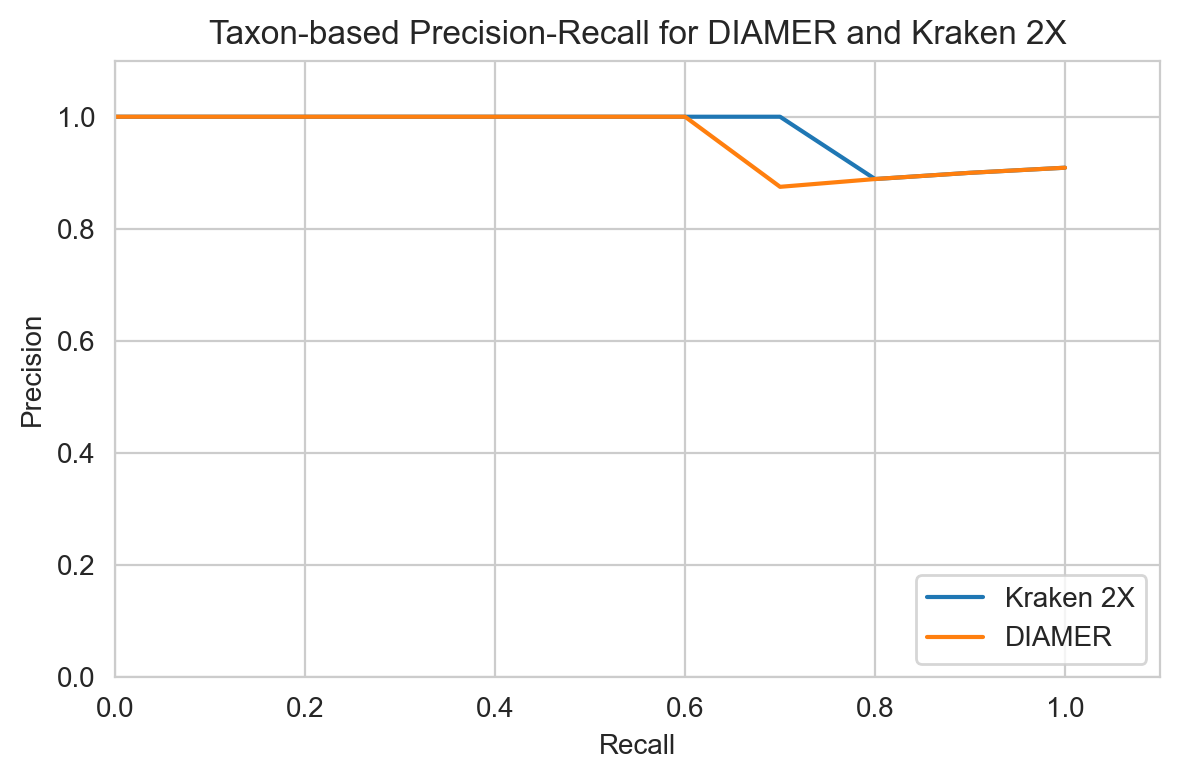

In [35]:
data_kraken_filtered = data_kraken[(data_kraken["column"] == "OVO (0.40) kmer count (cumulative)") & (data_kraken["rank"] == "species")]
data_diamer_filtered = data_diamer[(data_diamer["column"] == "OVO (0.40) kmer count (cumulative)") & (data_diamer["rank"] == "species")]
plt.figure(figsize=(6, 4), dpi=200, tight_layout=True)
plt.plot(data_kraken_filtered["recall"], data_kraken_filtered["precision"], label="Kraken 2X")
plt.plot(data_diamer_filtered["recall"], data_diamer_filtered["precision"], label="DIAMER")
plt.xlim(0, 1.1)
plt.xlabel("Recall")
plt.ylim(0, 1.1)
plt.ylabel("Precision")
plt.title("Taxon-based Precision-Recall for DIAMER and Kraken 2X")
plt.legend(loc="lower right")
plt.show()

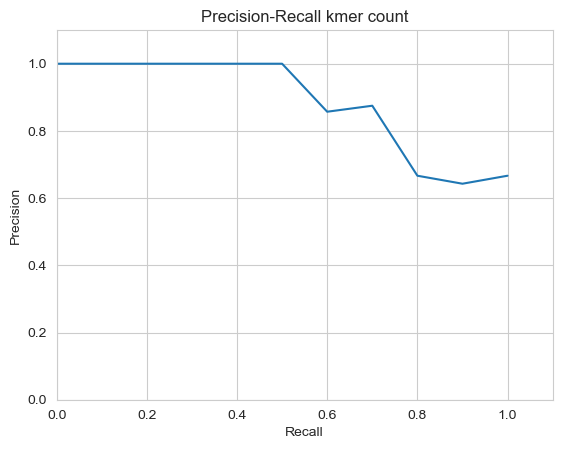

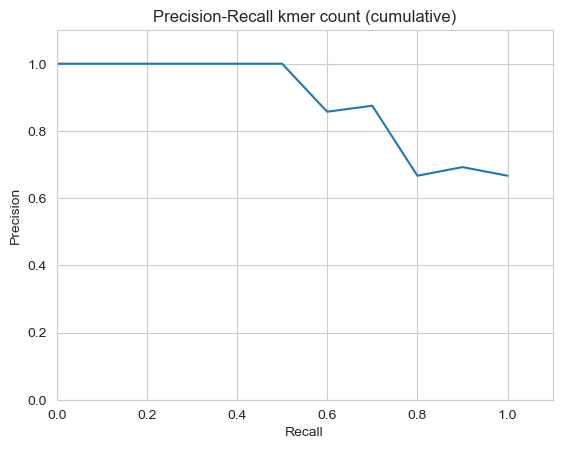

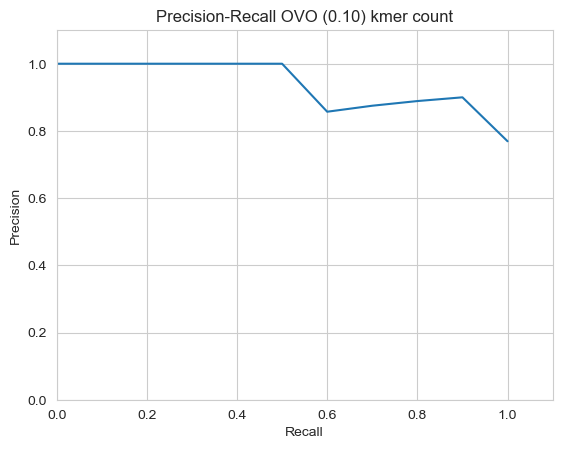

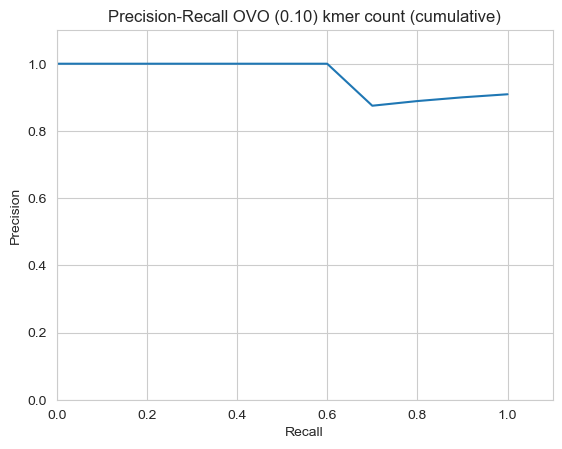

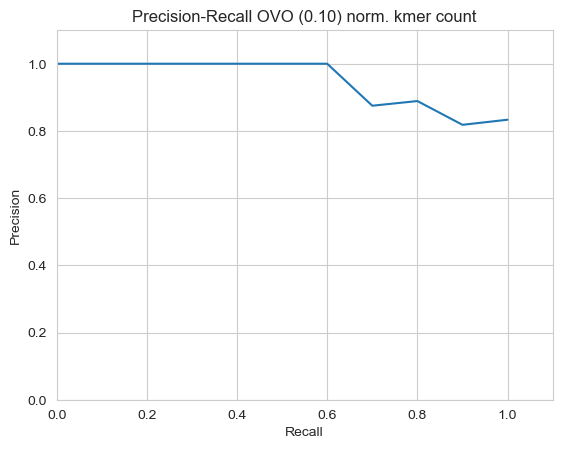

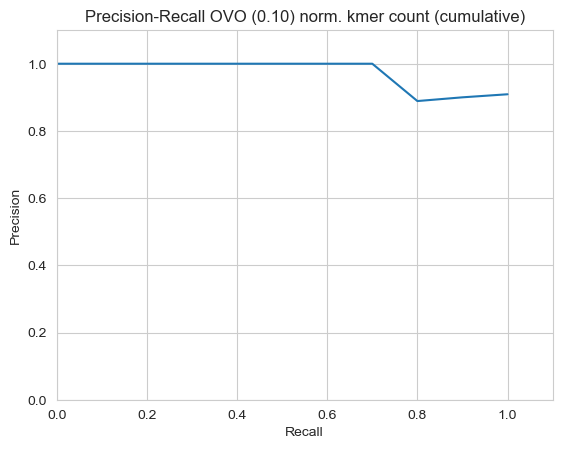

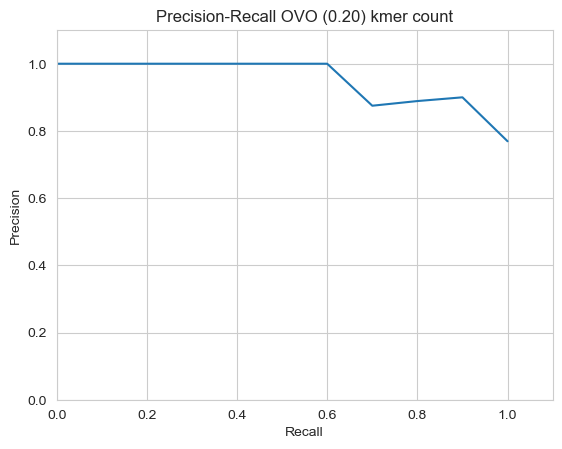

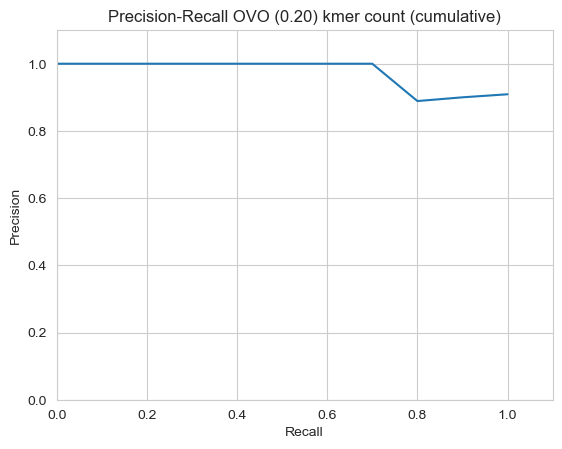

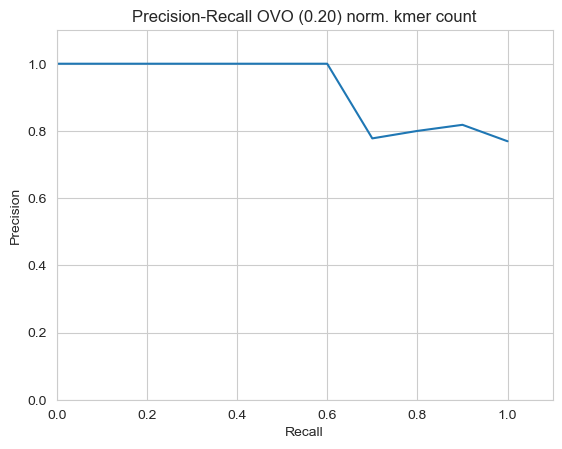

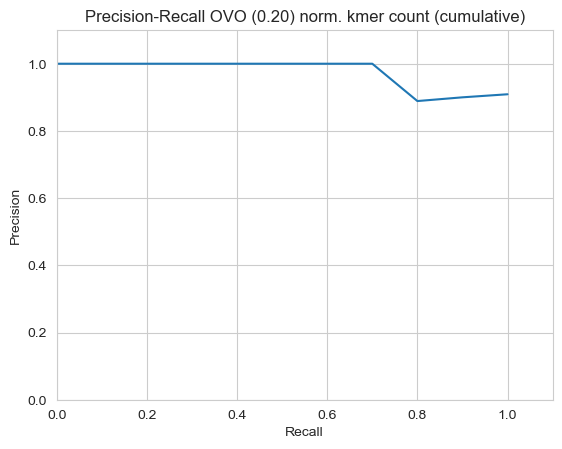

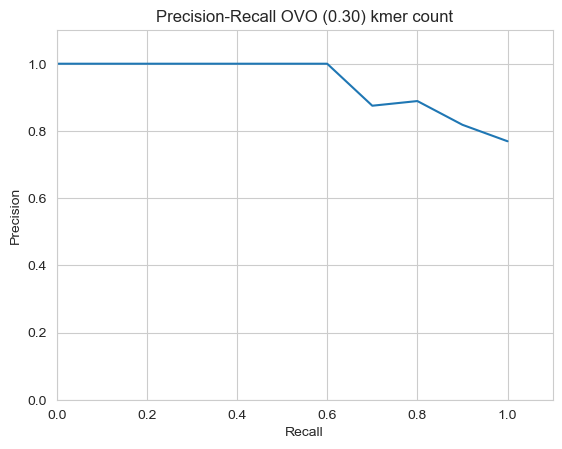

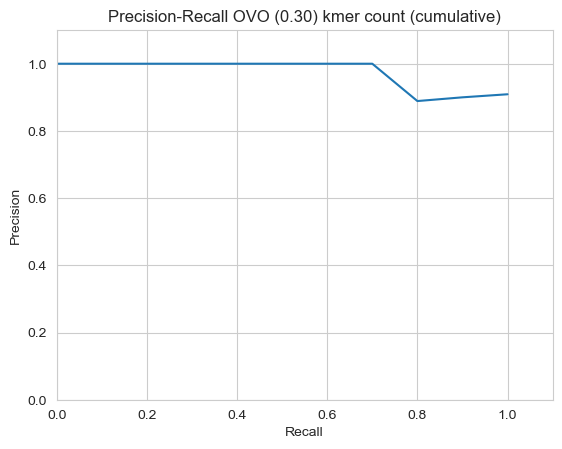

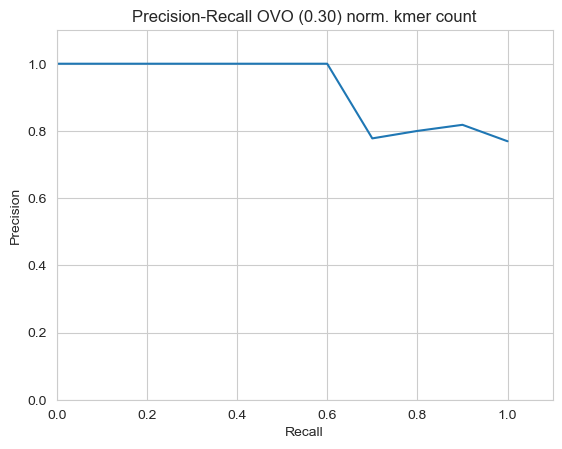

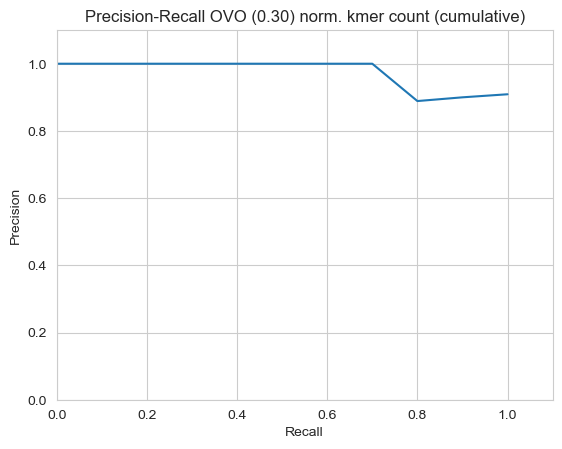

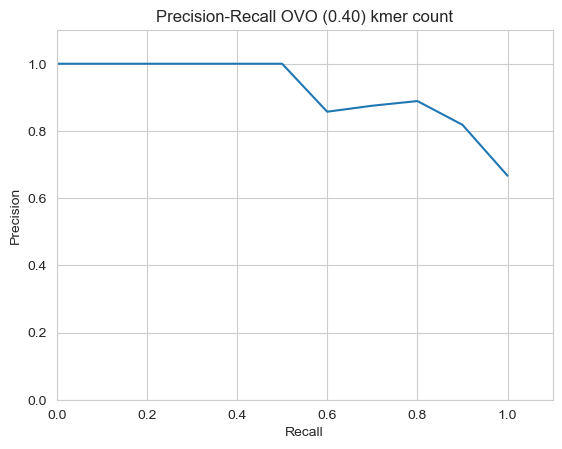

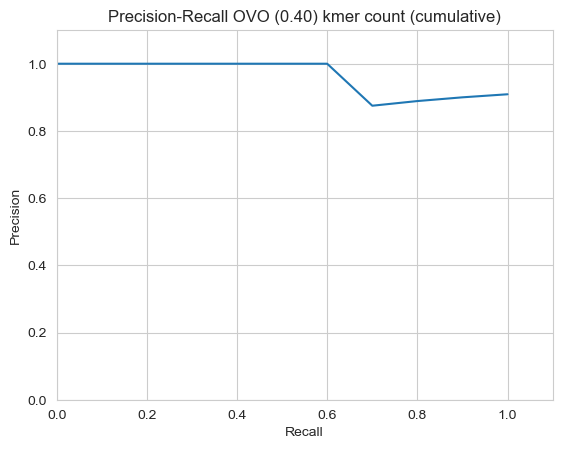

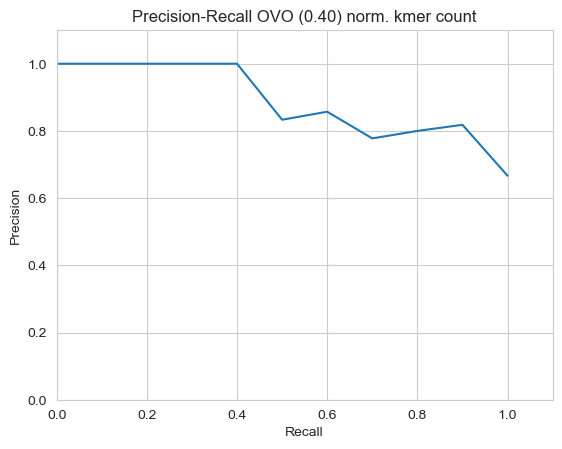

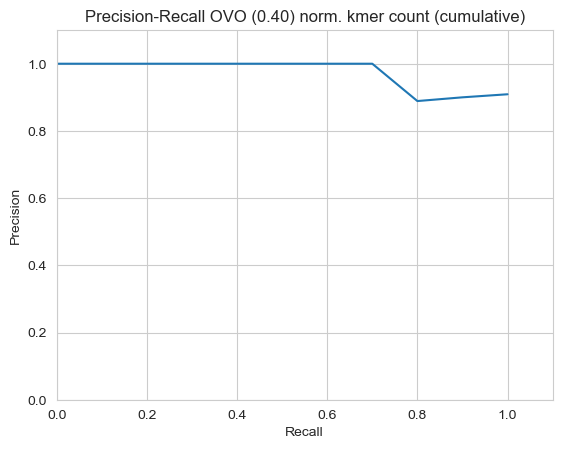

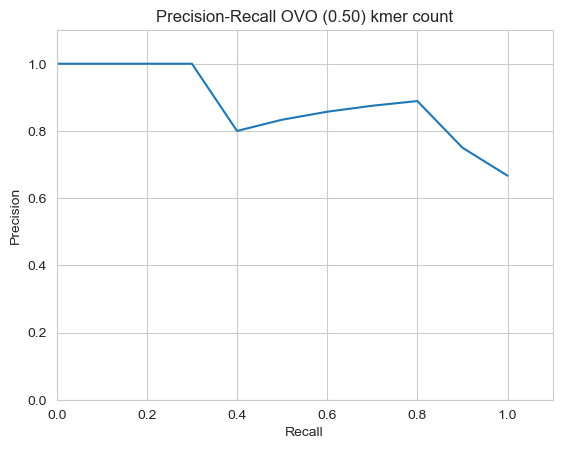

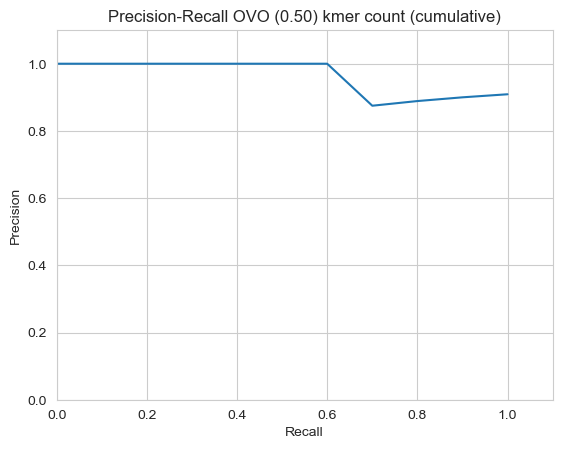

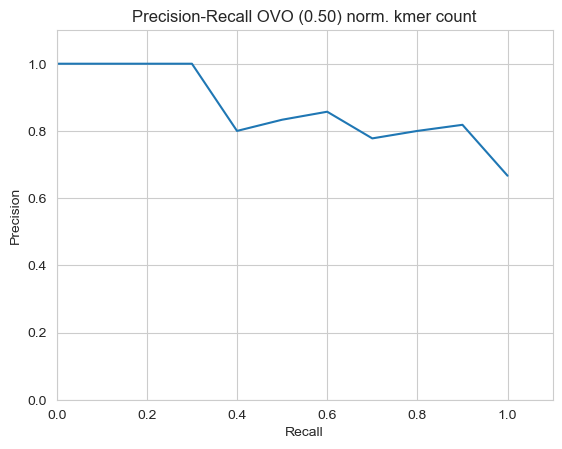

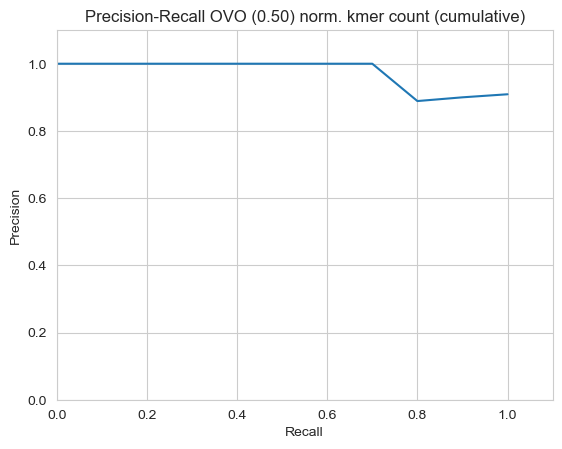

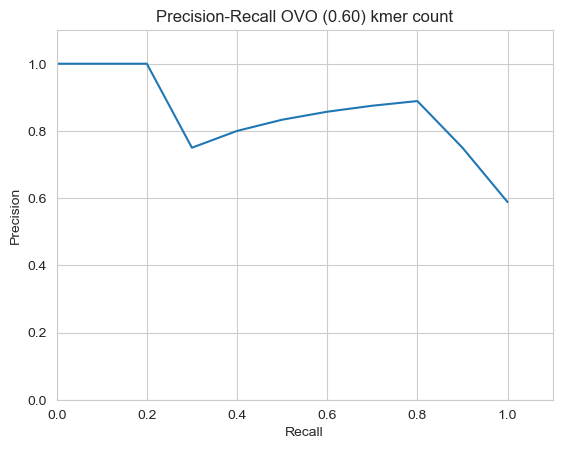

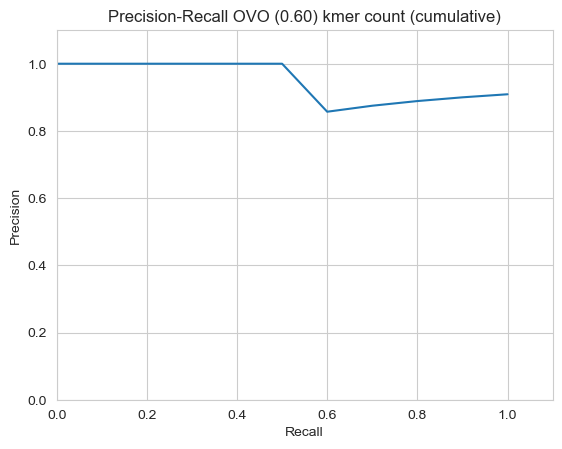

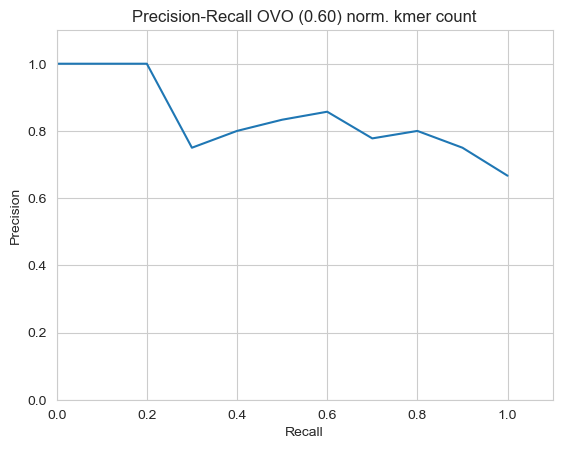

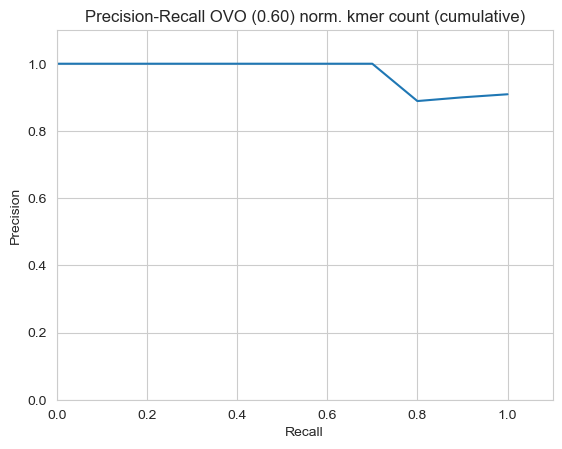

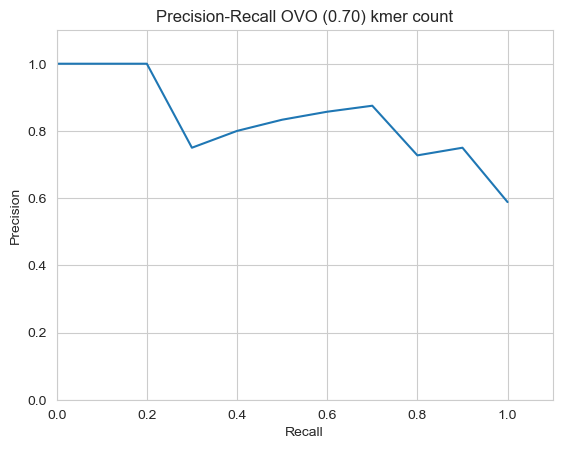

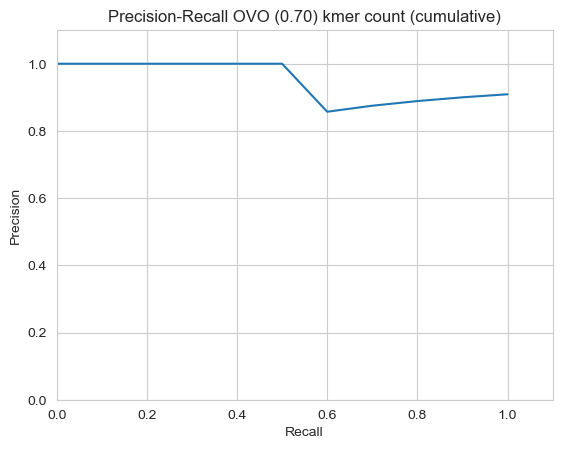

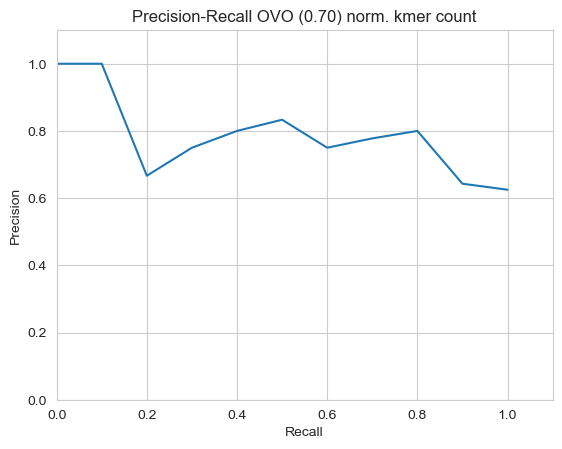

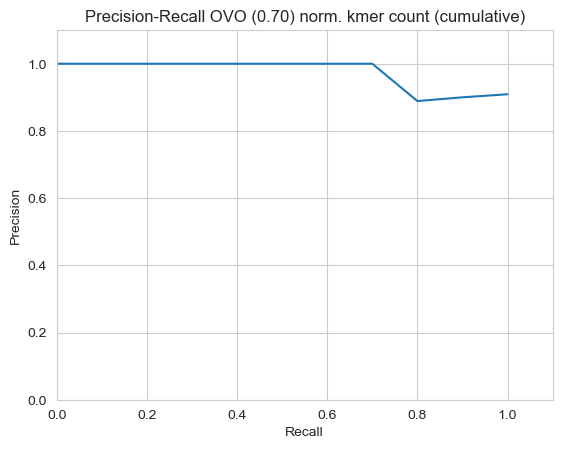

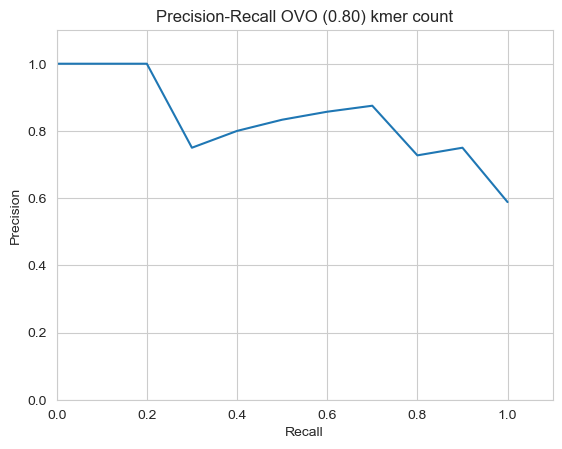

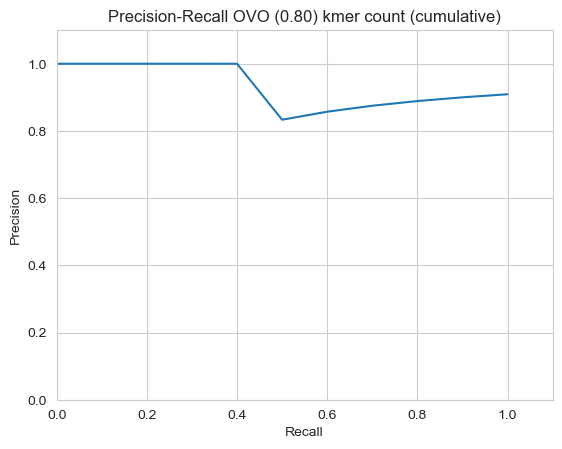

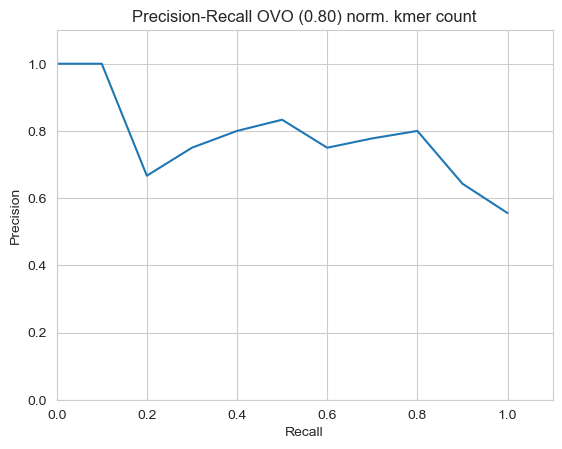

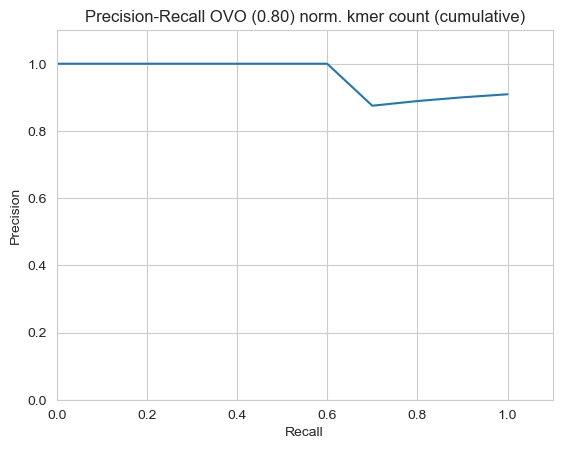

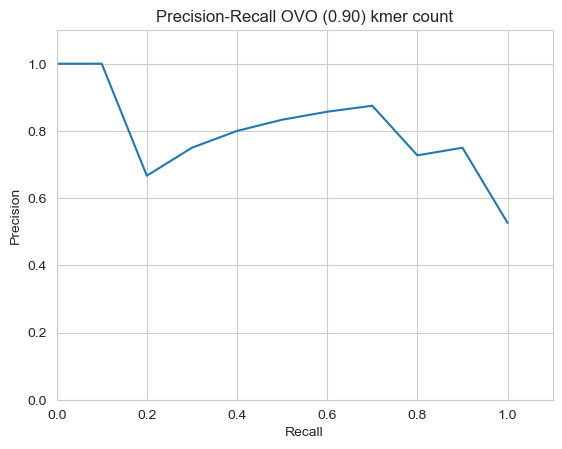

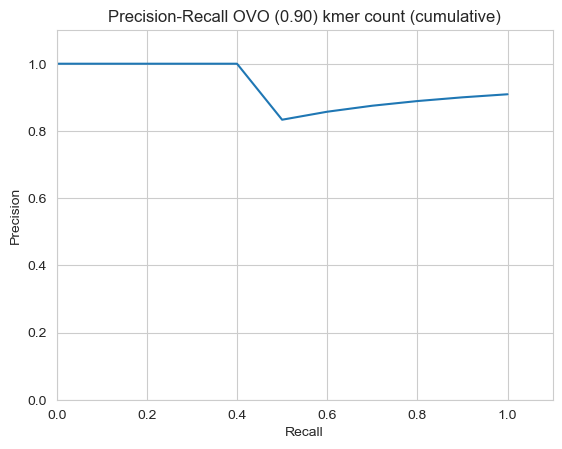

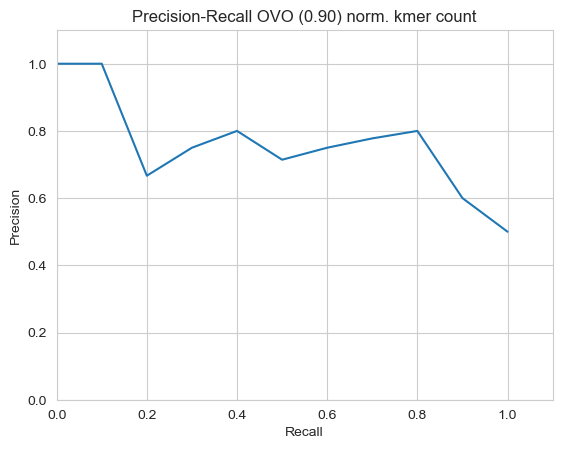

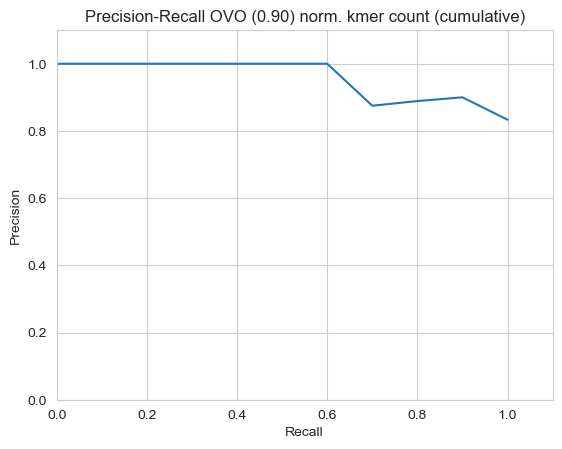

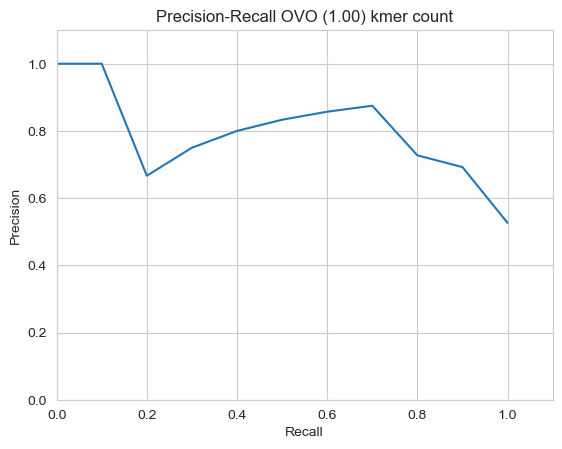

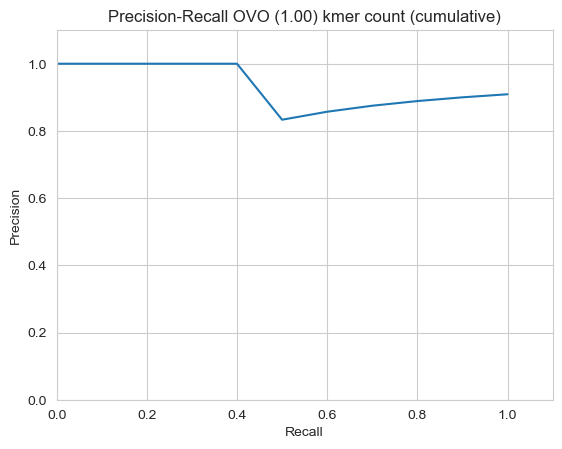

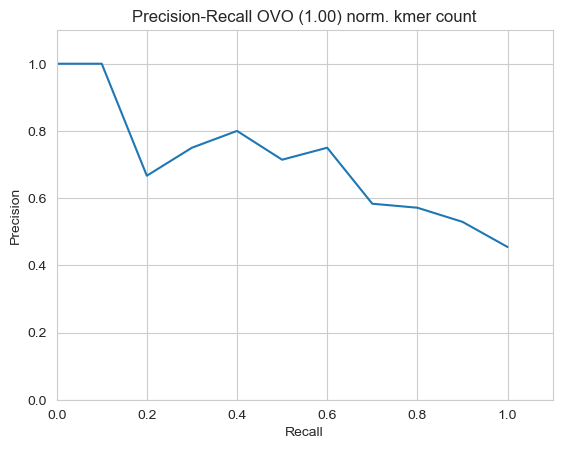

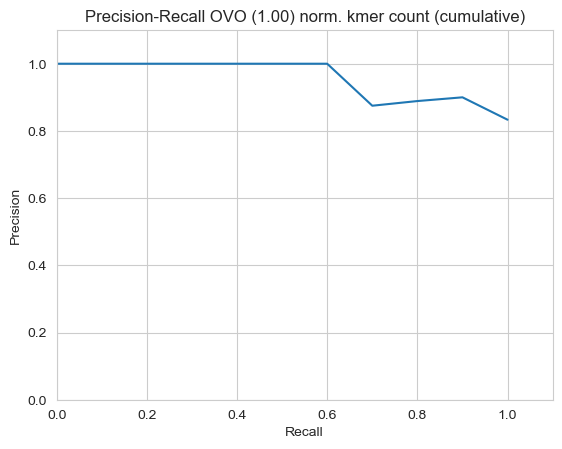

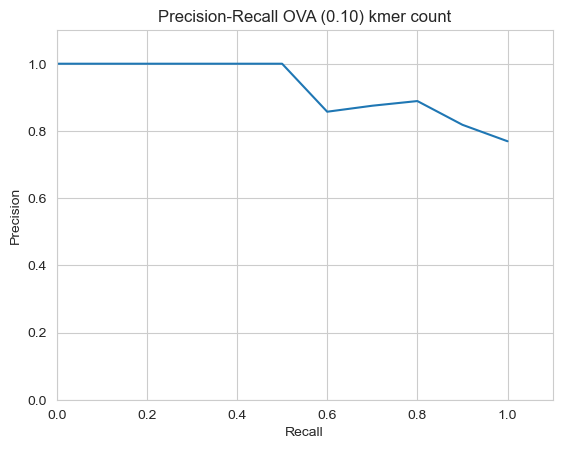

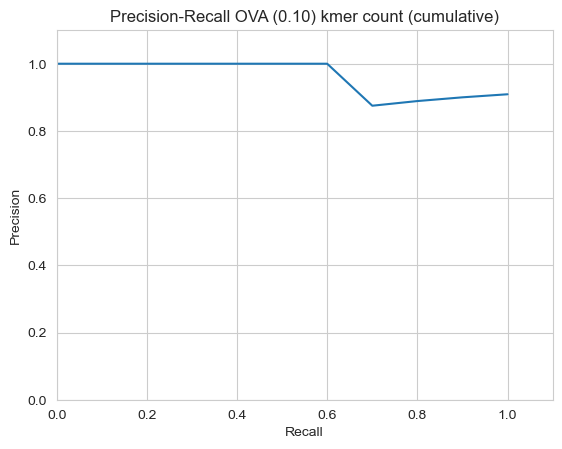

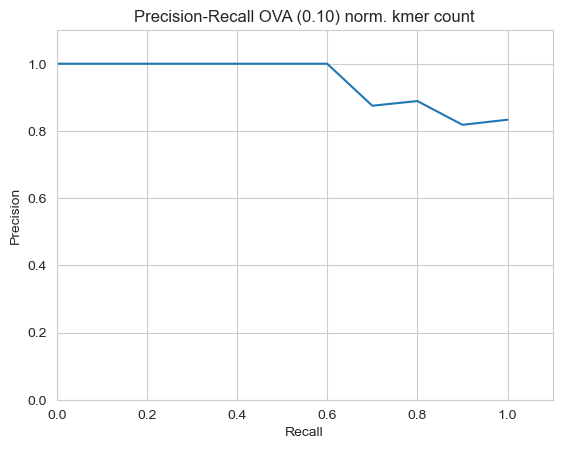

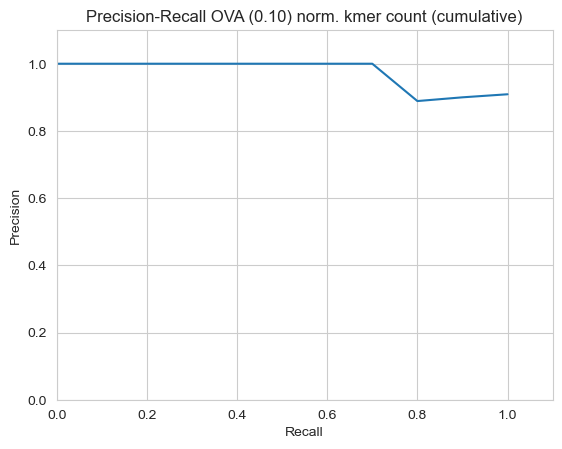

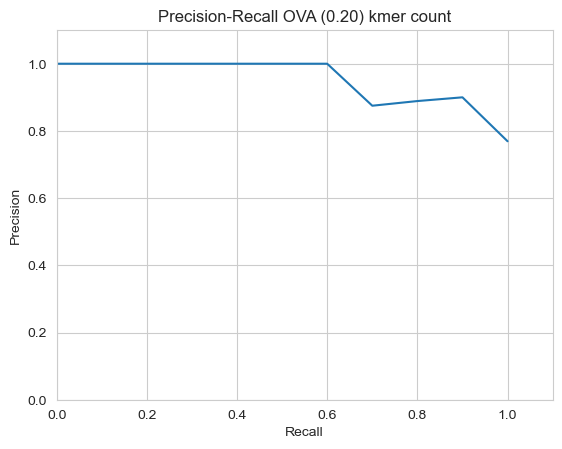

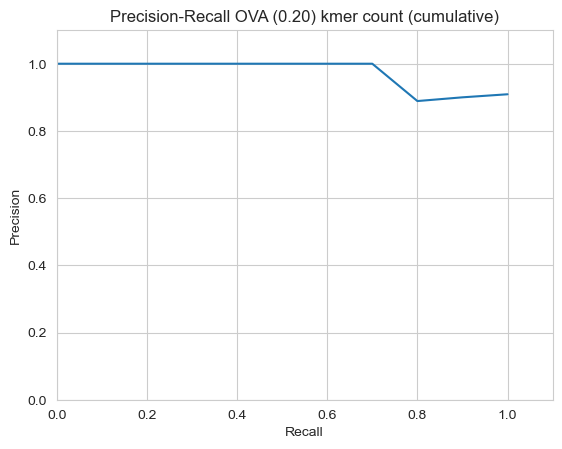

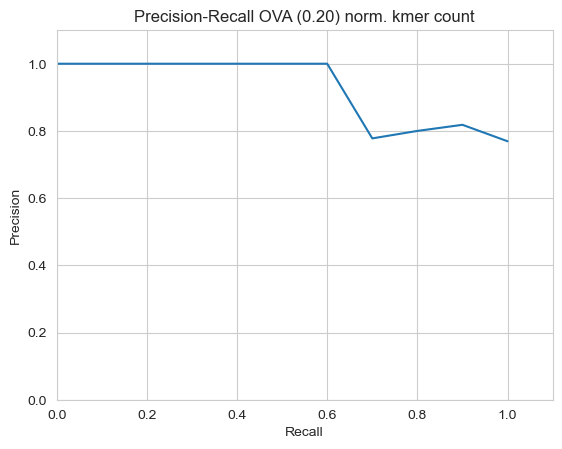

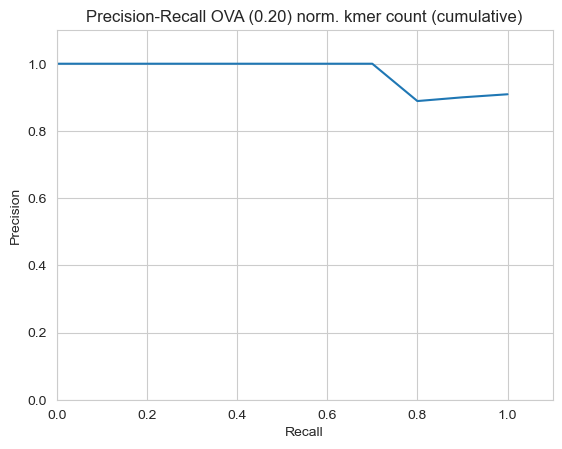

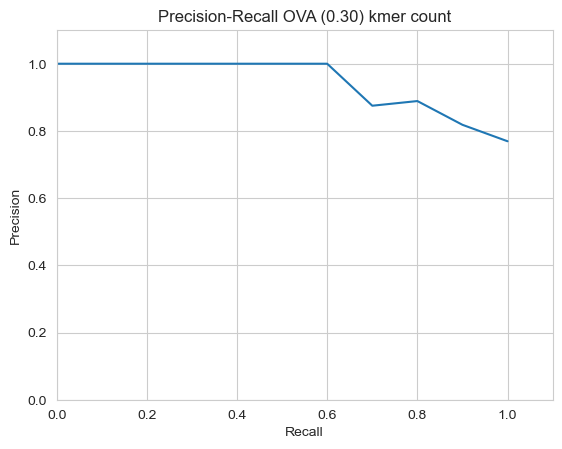

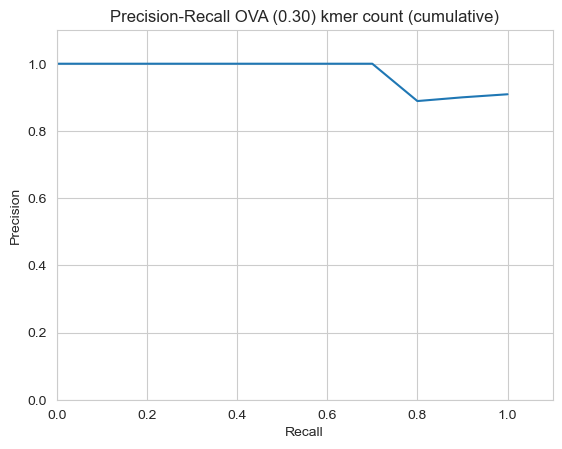

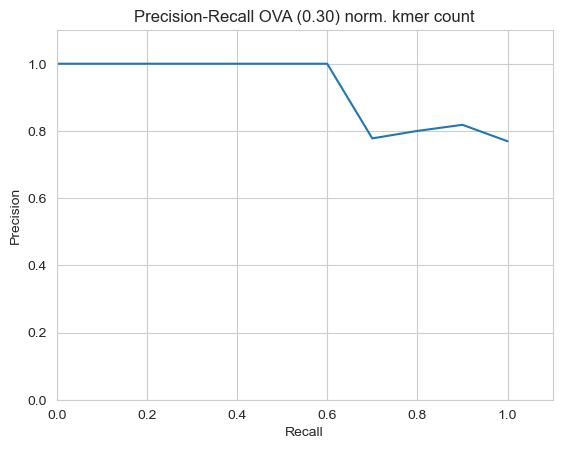

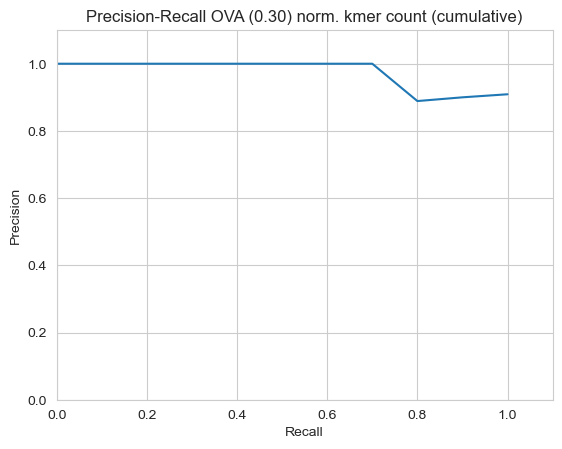

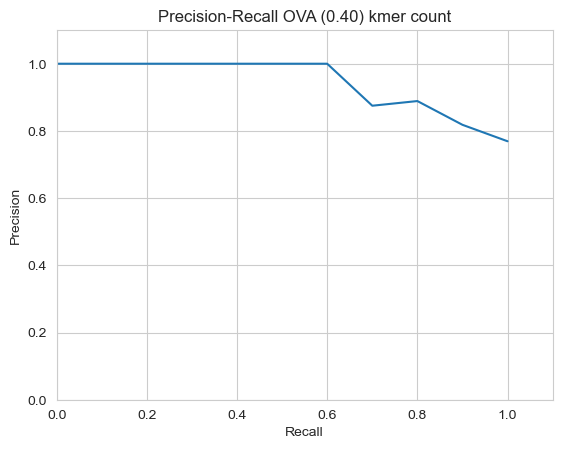

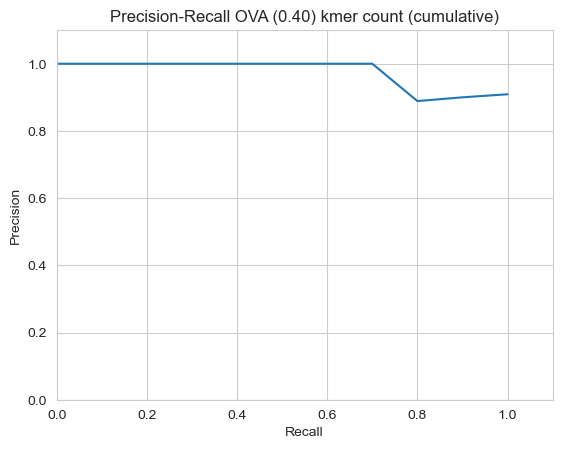

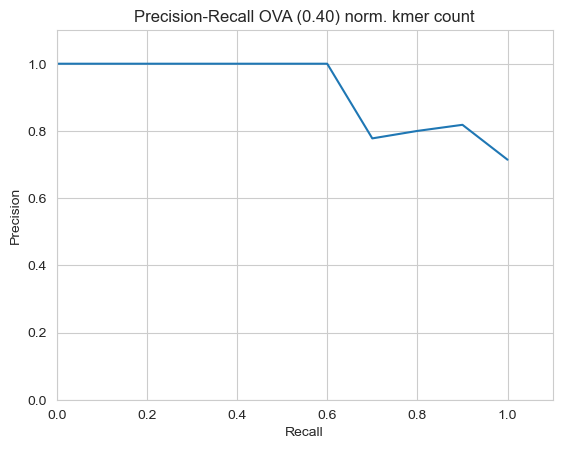

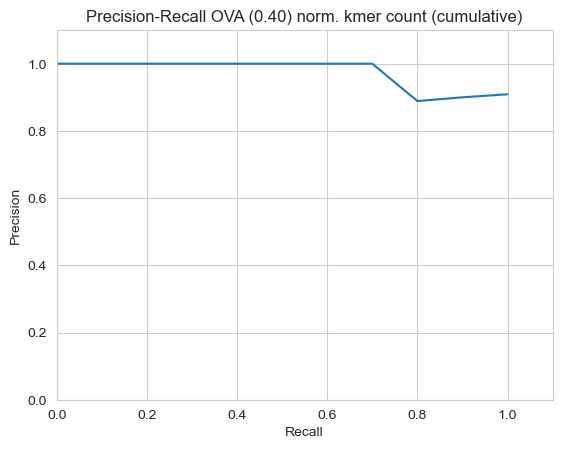

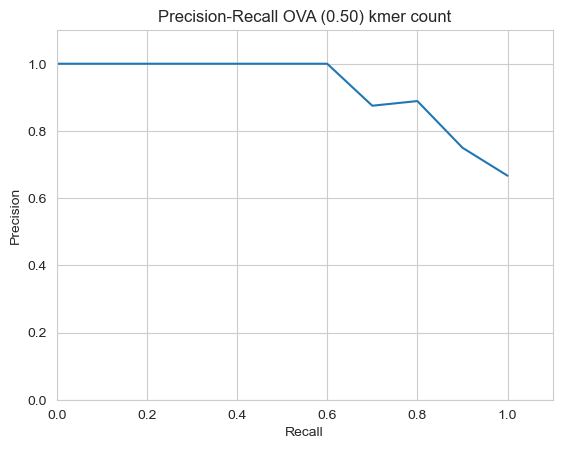

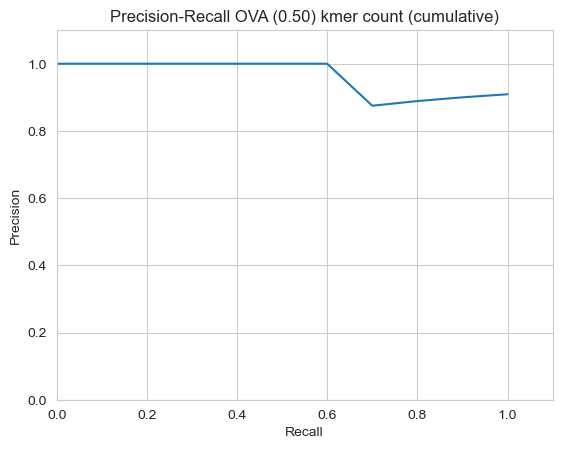

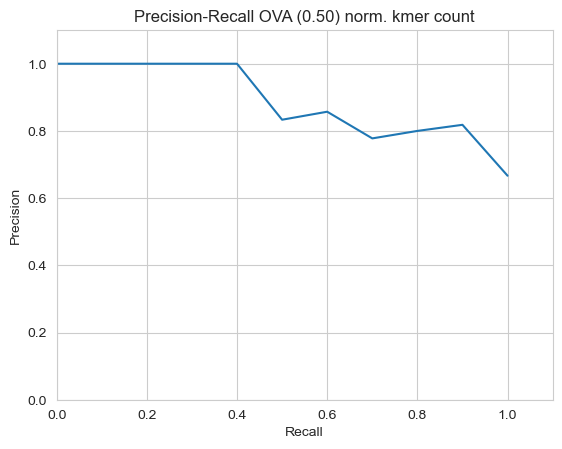

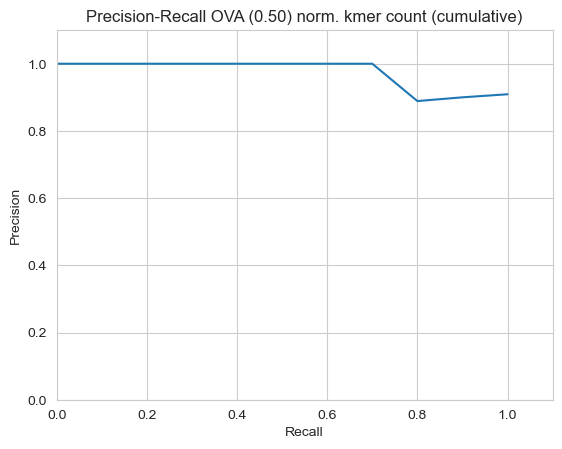

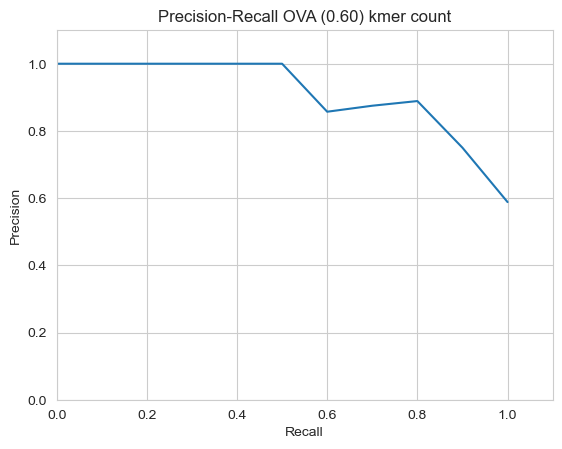

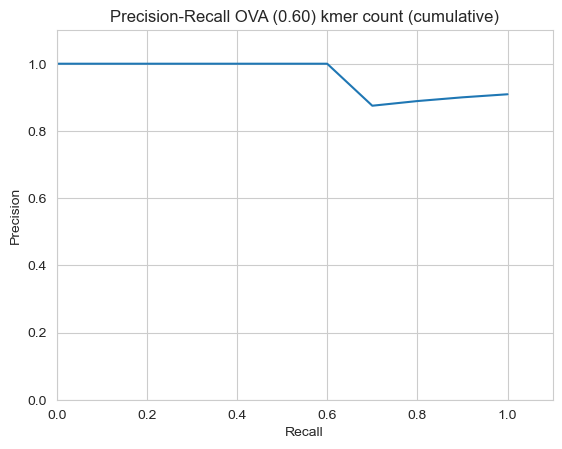

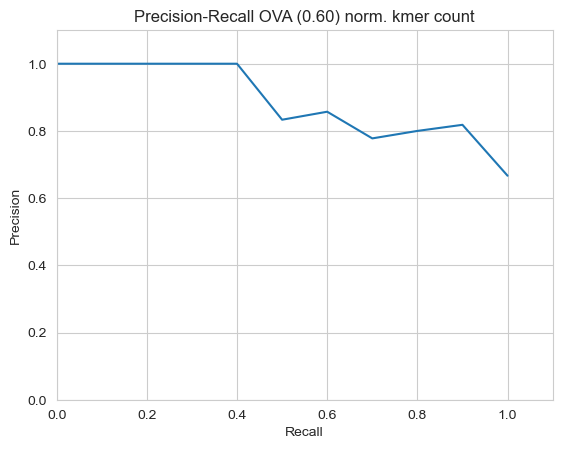

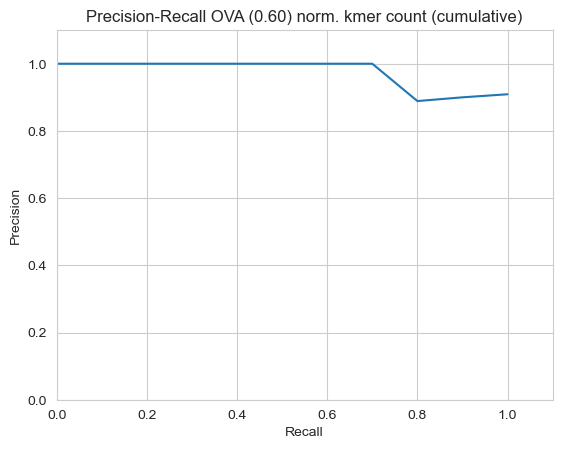

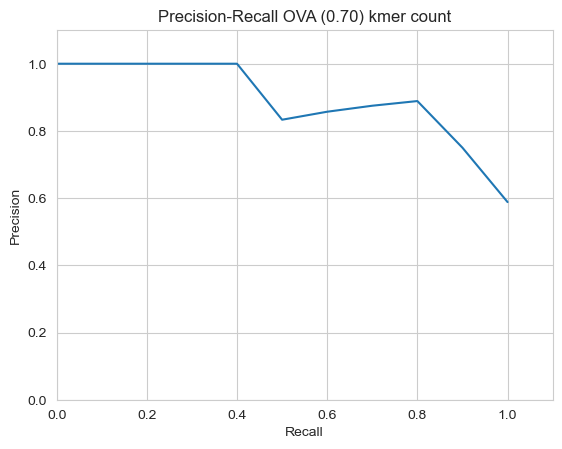

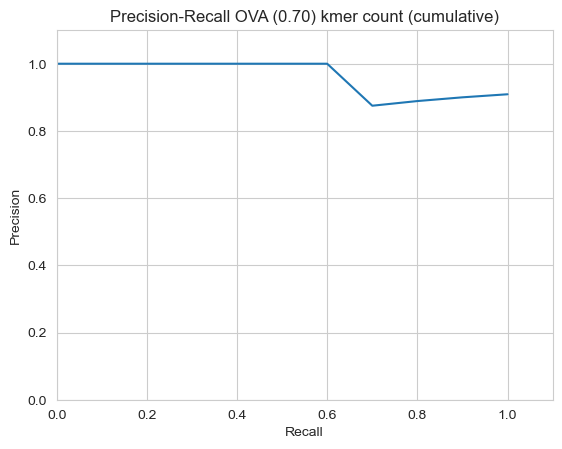

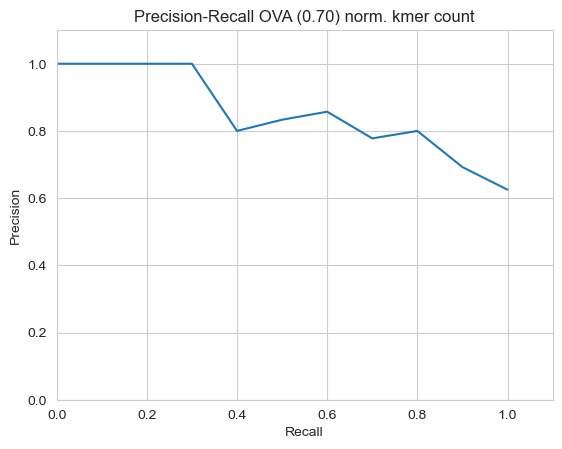

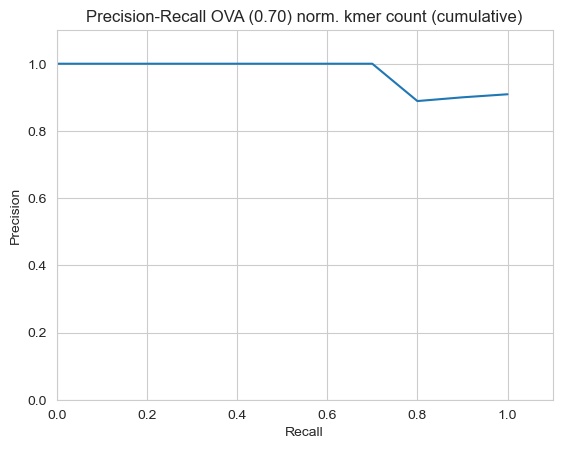

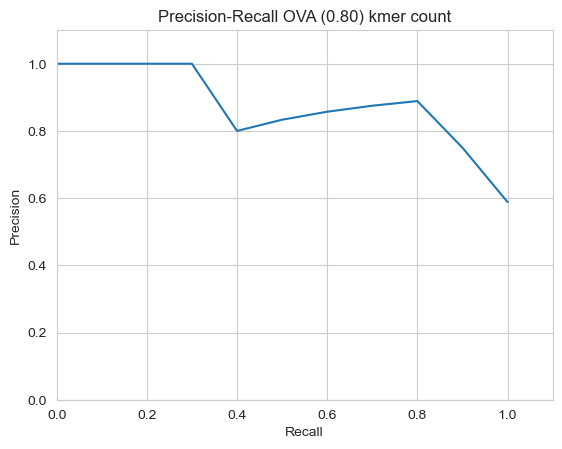

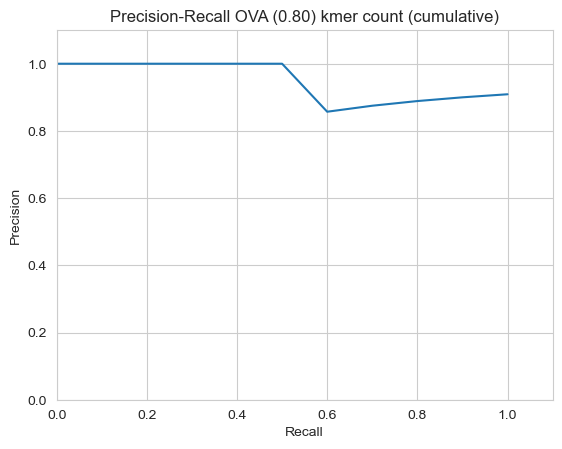

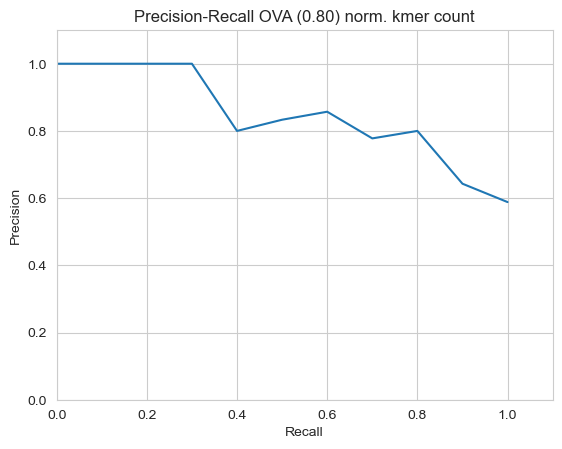

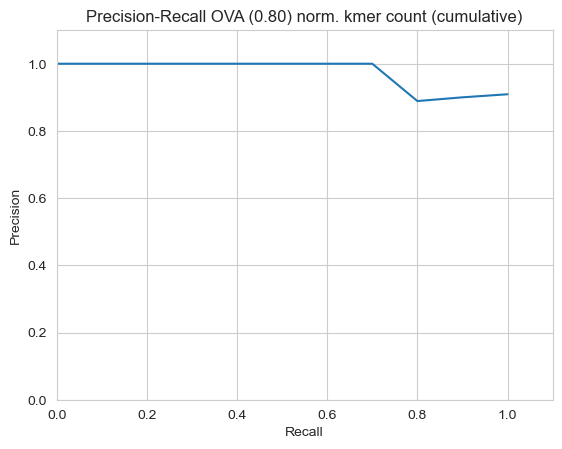

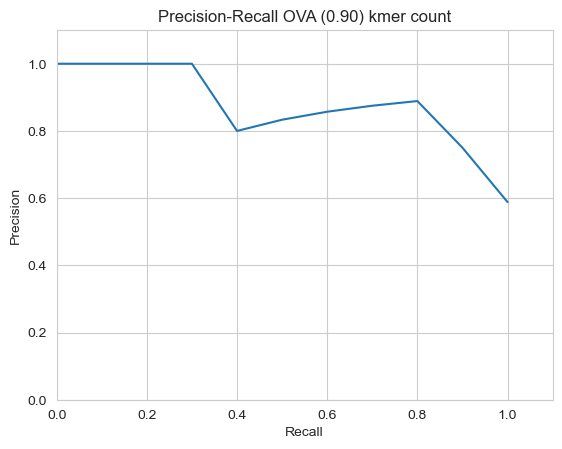

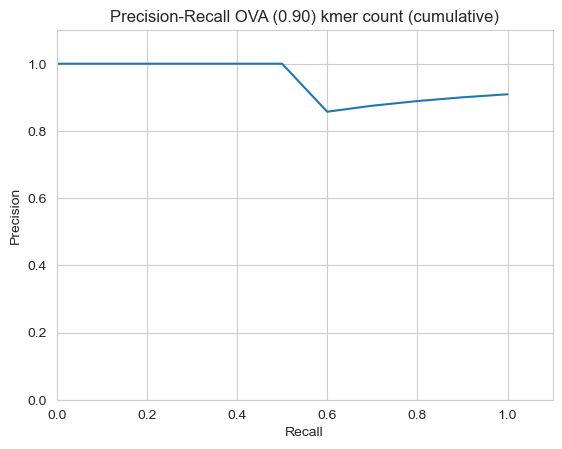

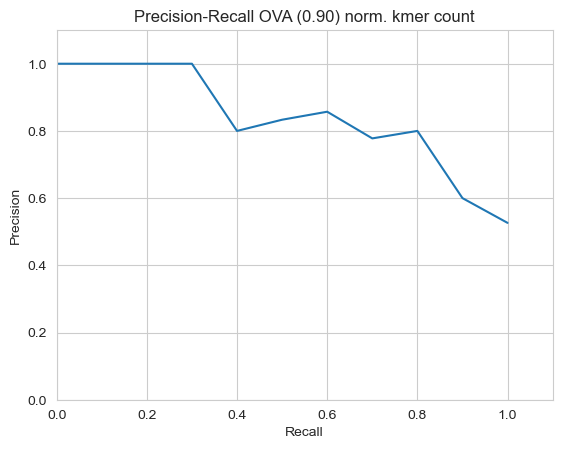

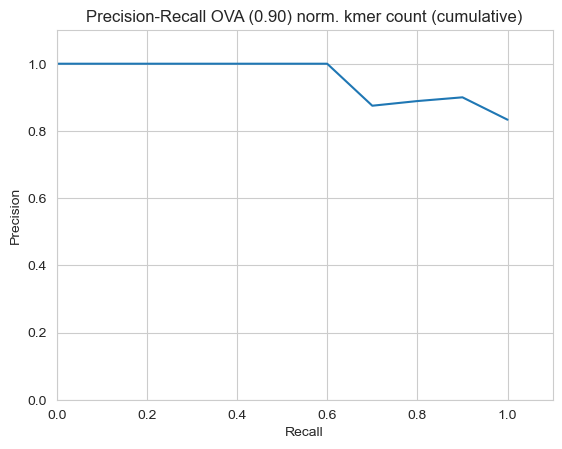

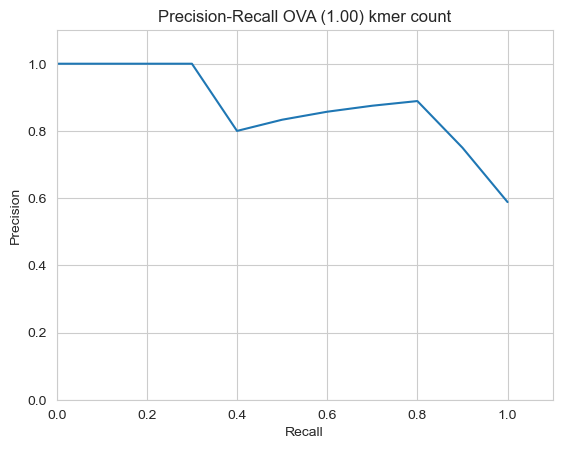

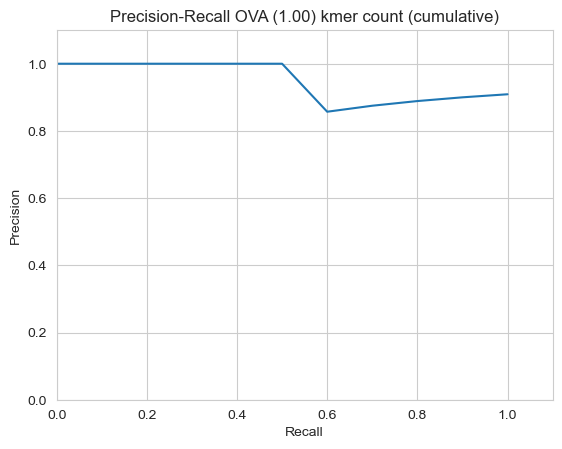

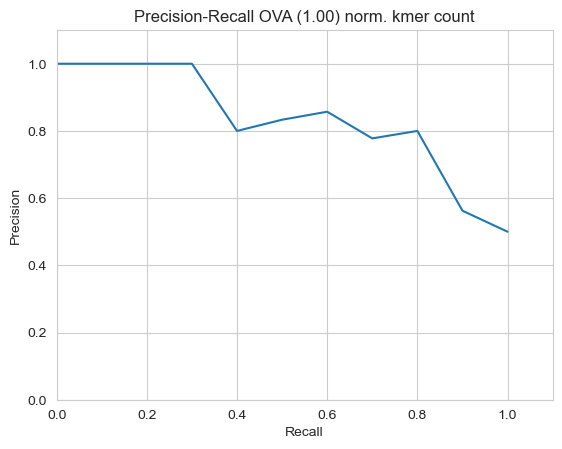

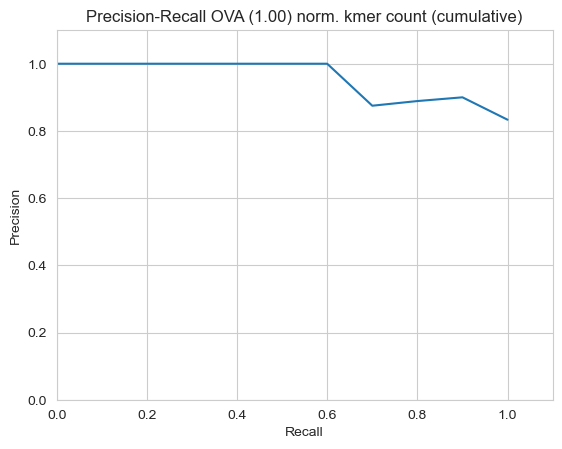

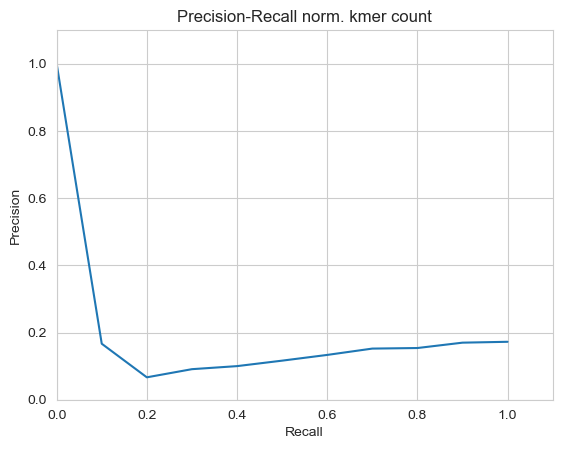

In [5]:
for column in data_diamer["column"].unique():
    for rank in ["species"]: # pr["rank"].unique()
        data = data_diamer[(data_diamer["column"] == column) & (data_diamer["rank"] == rank)]
        plt.plot(data["recall"], data["precision"], label=rank)
    plt.xlim(0, 1.1)
    plt.xlabel("Recall")
    plt.ylim(0, 1.1)
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall {column}")
    plt.show()

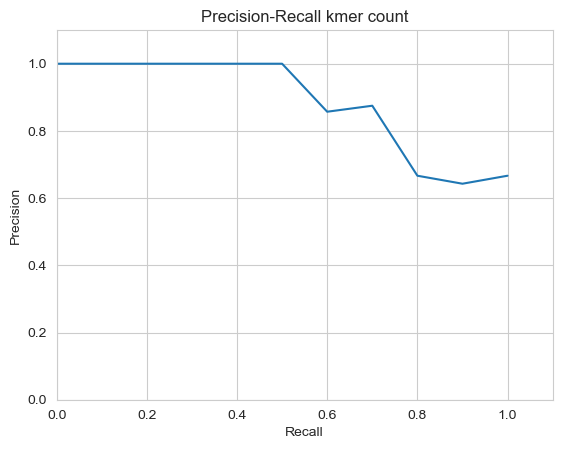

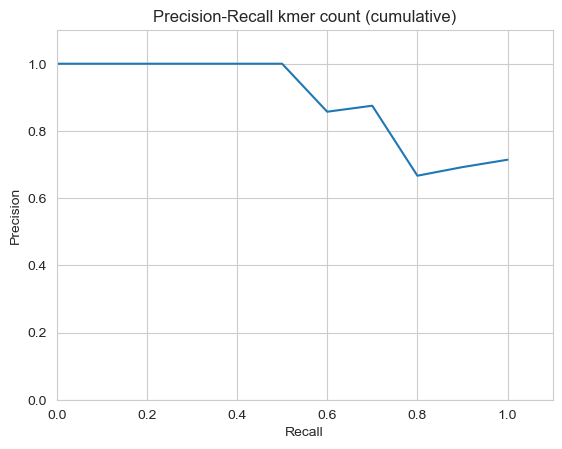

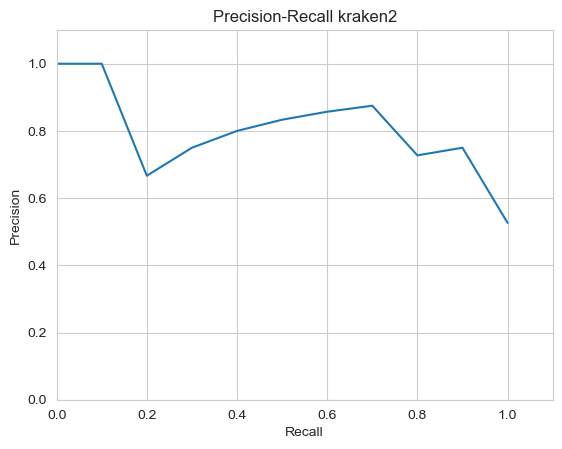

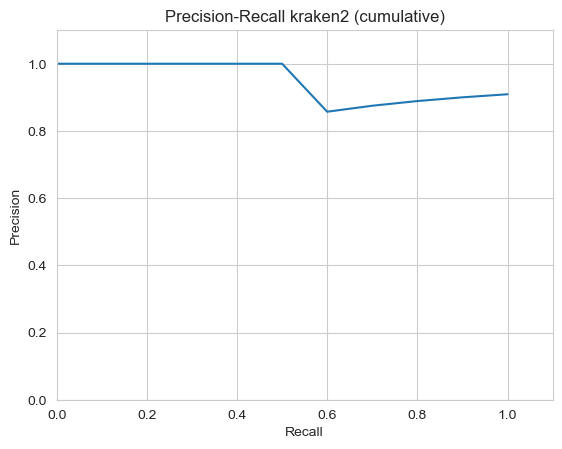

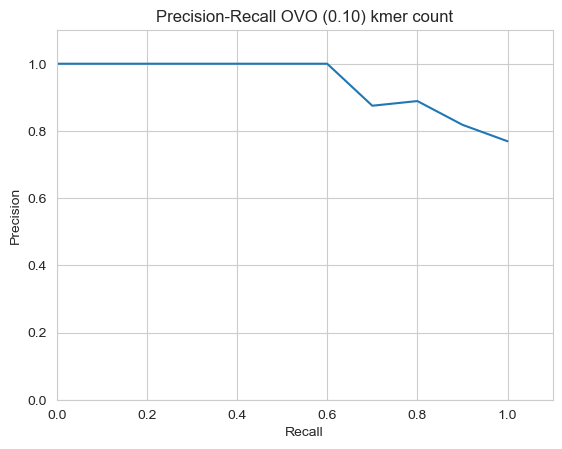

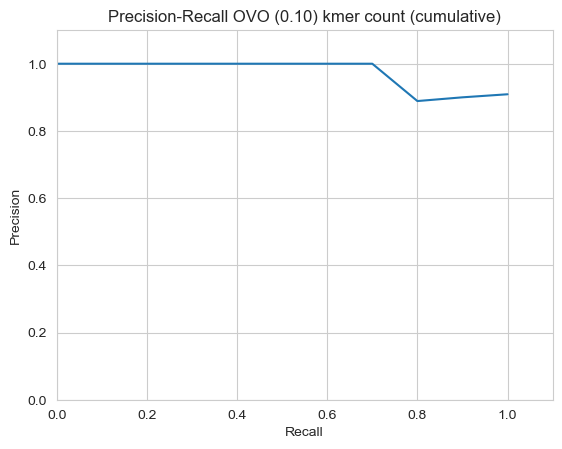

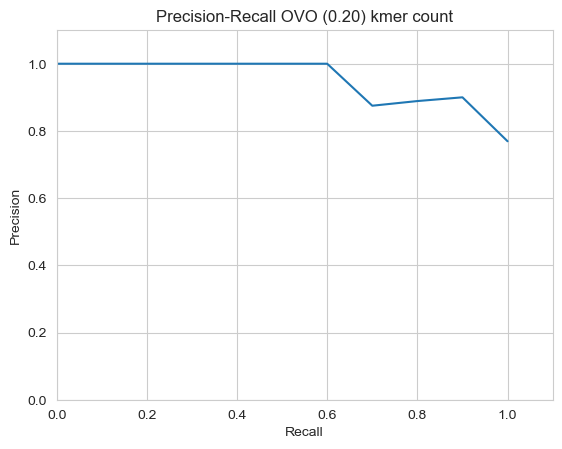

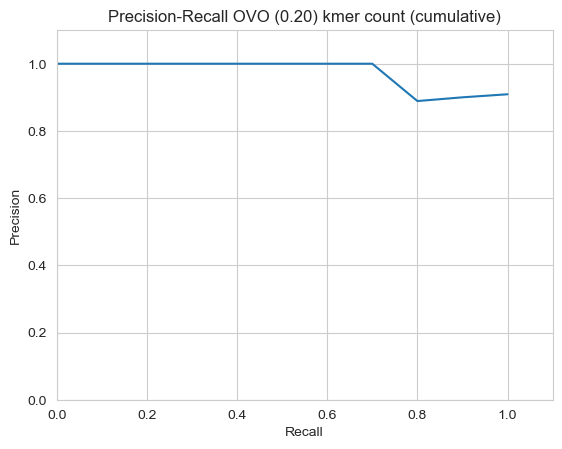

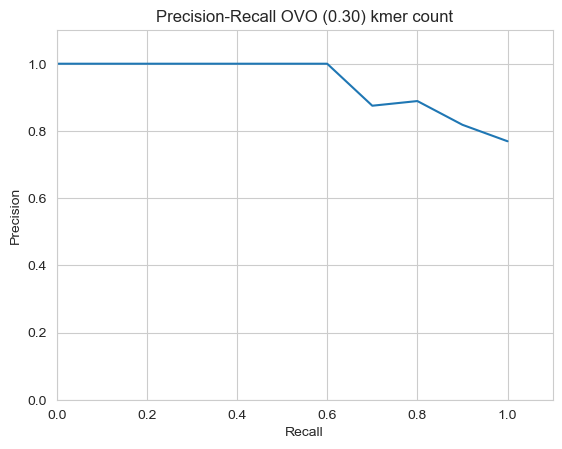

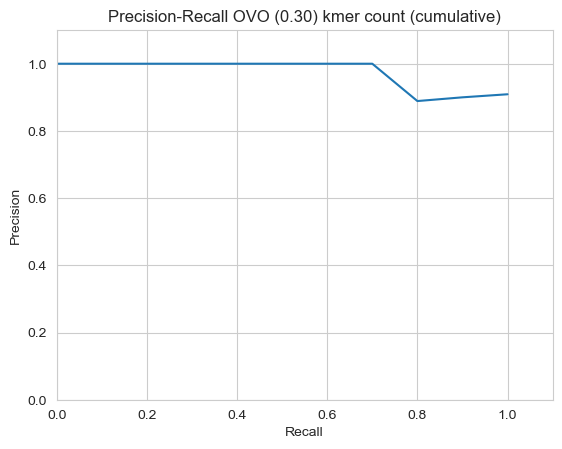

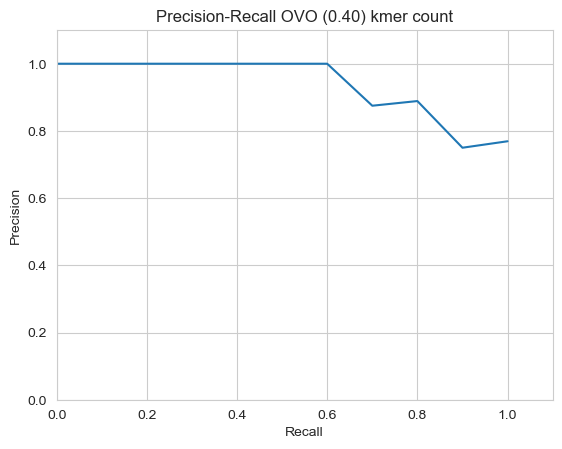

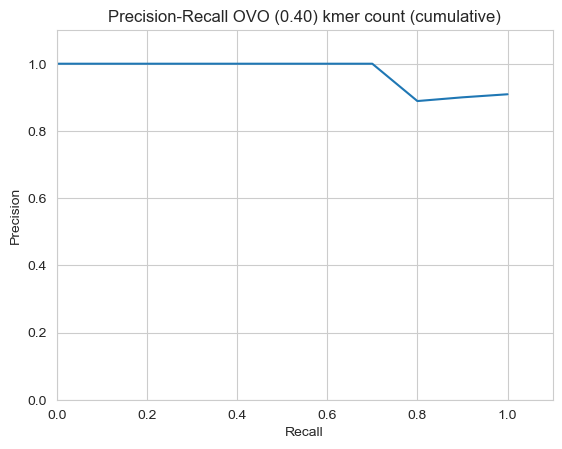

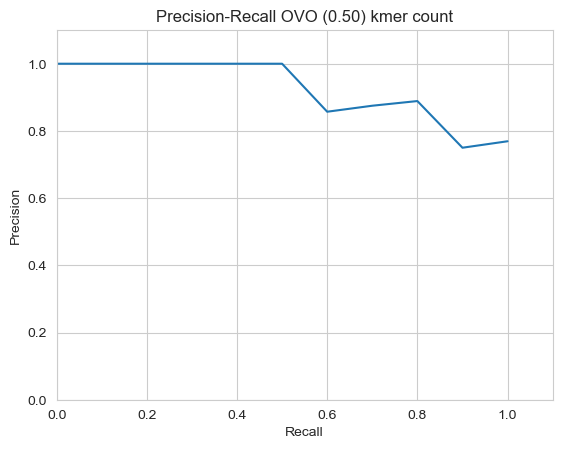

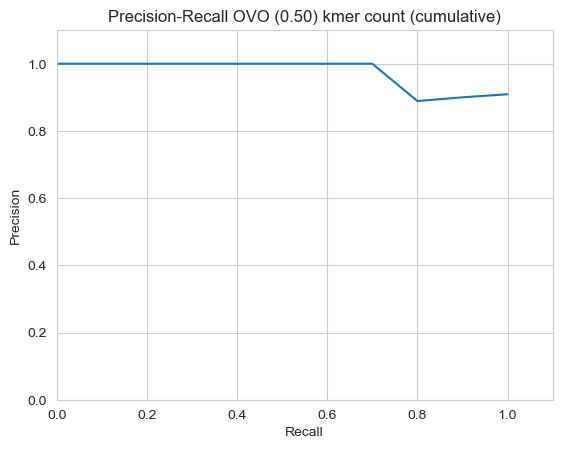

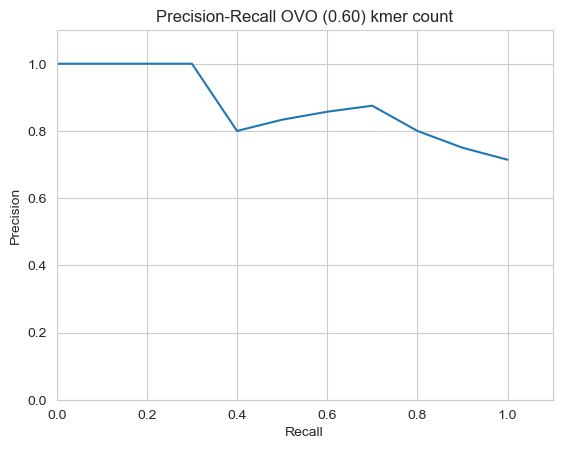

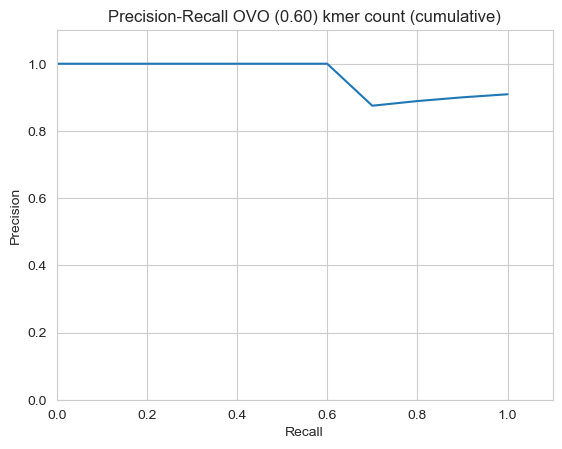

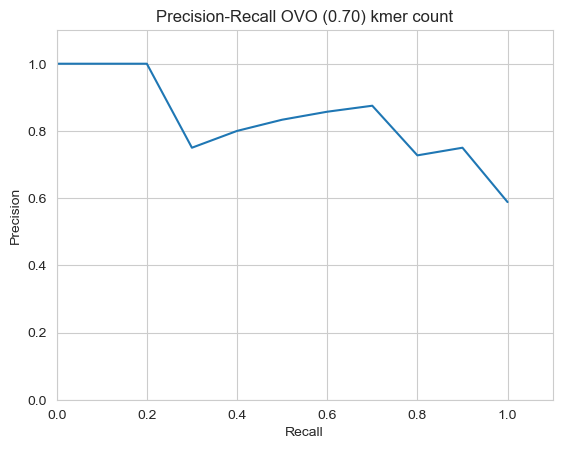

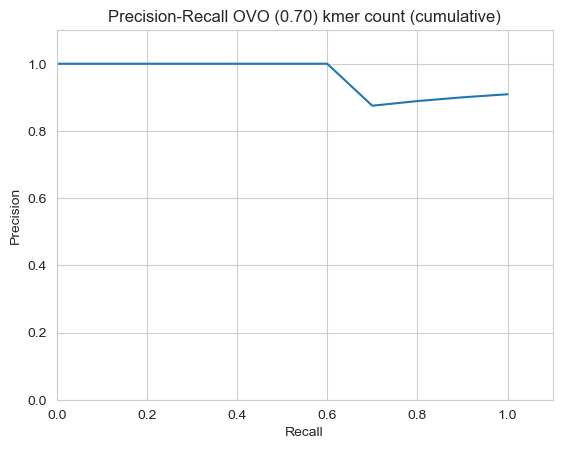

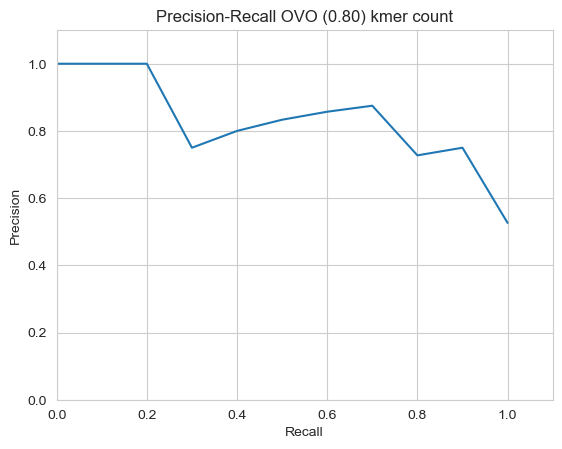

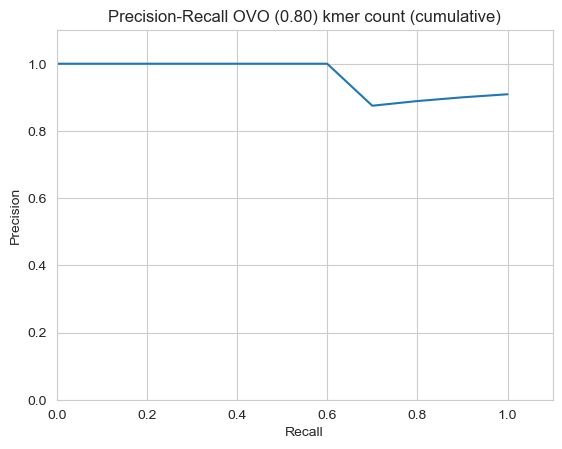

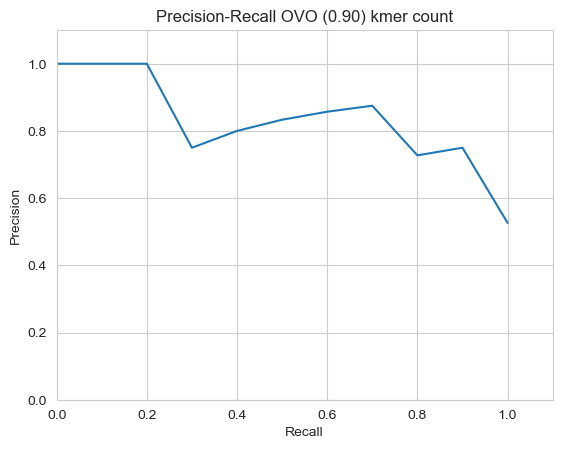

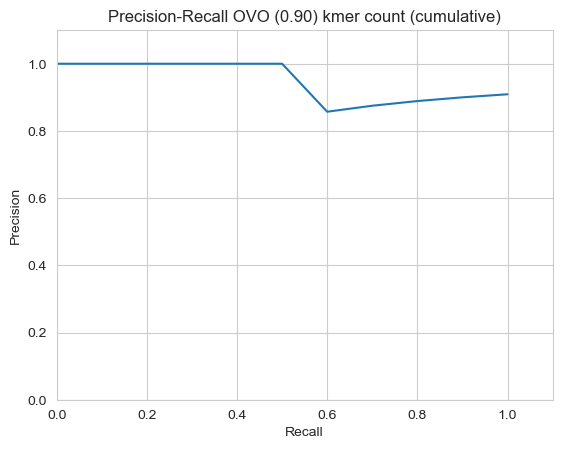

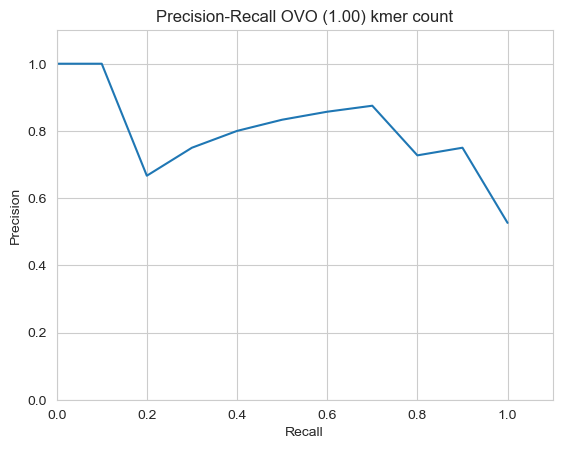

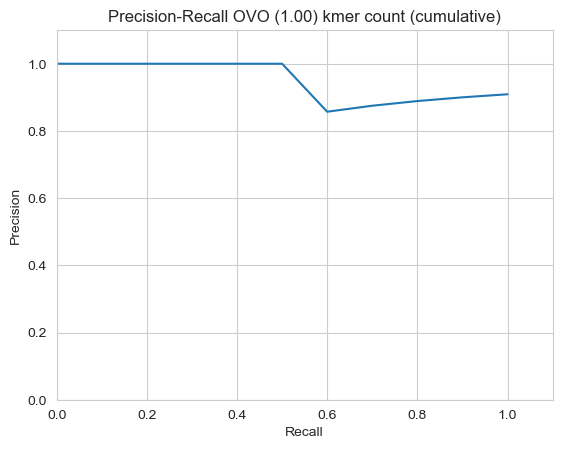

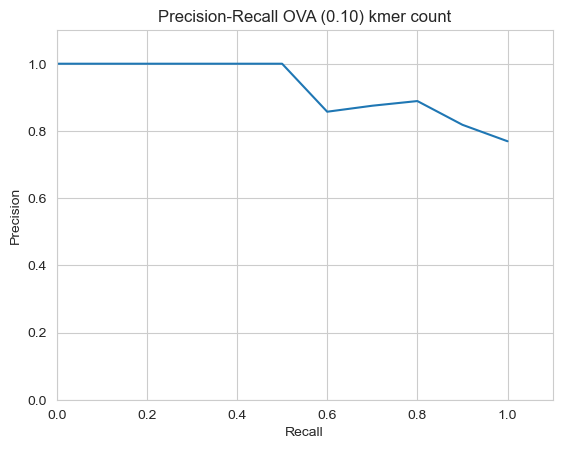

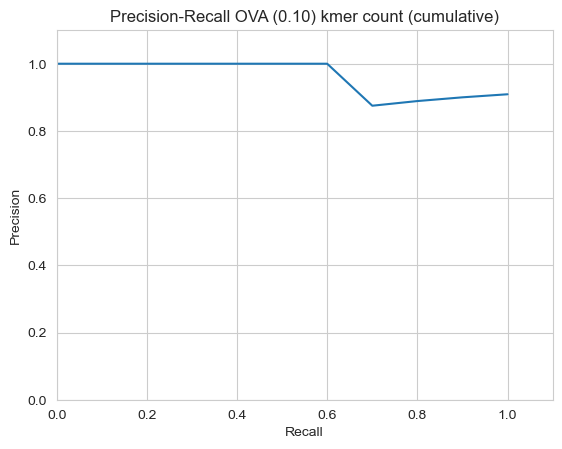

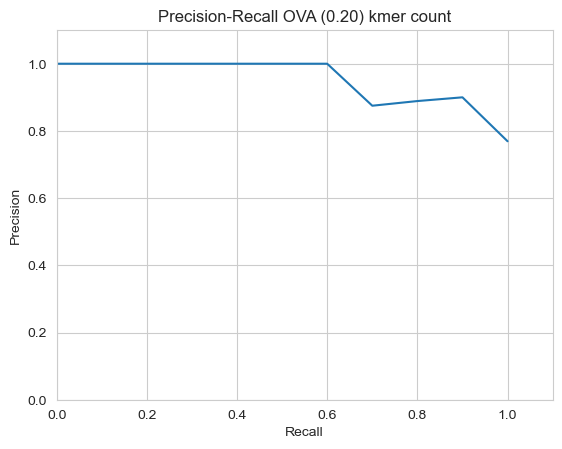

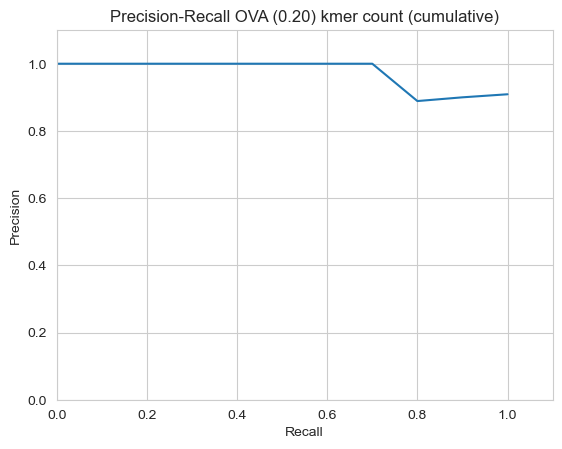

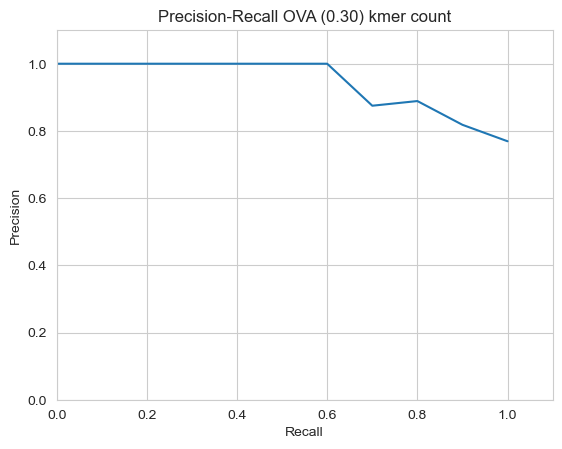

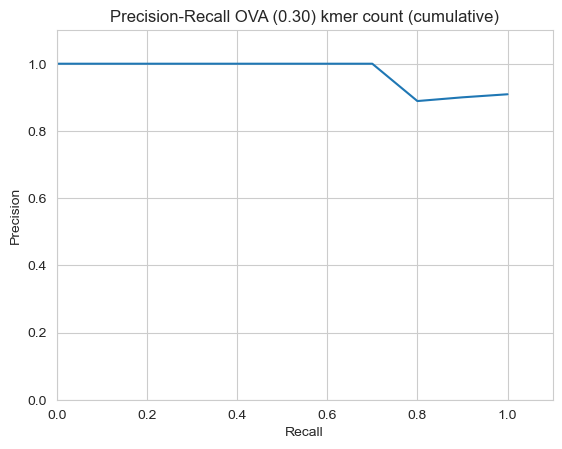

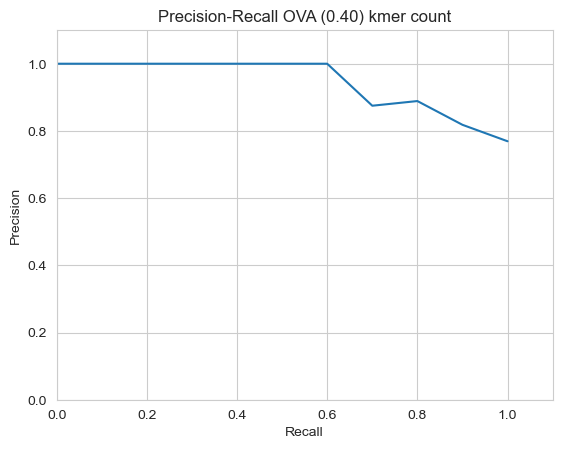

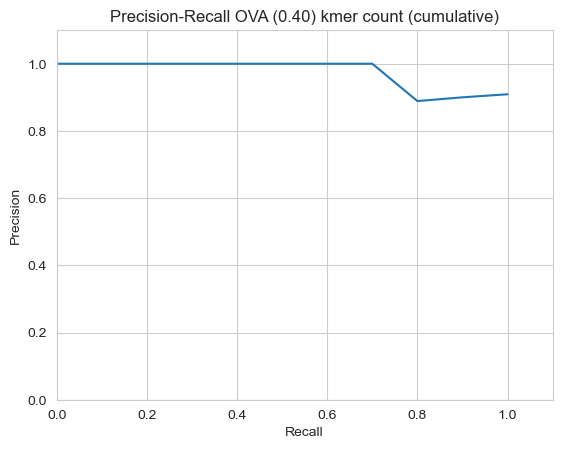

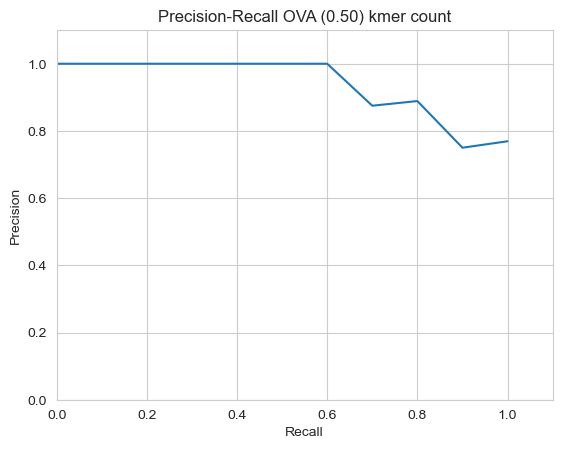

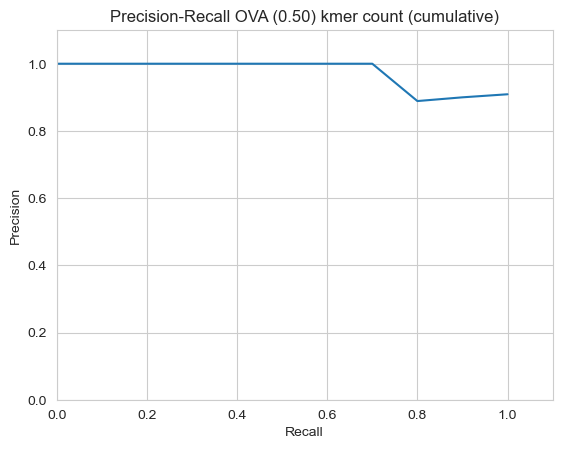

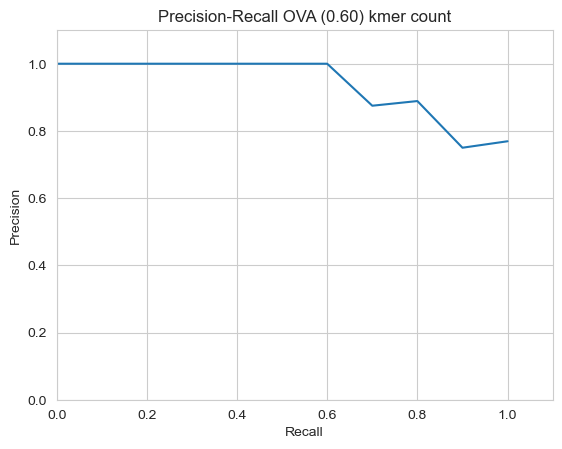

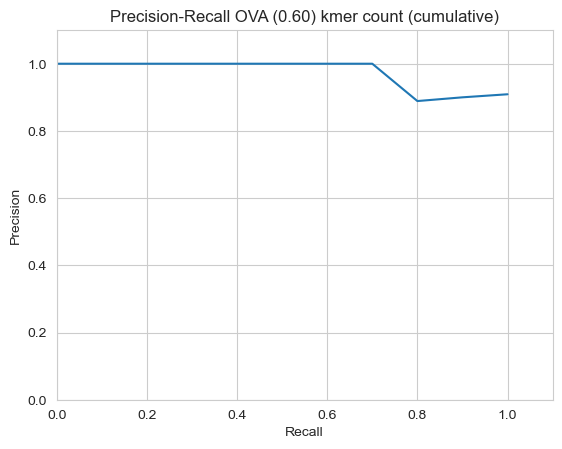

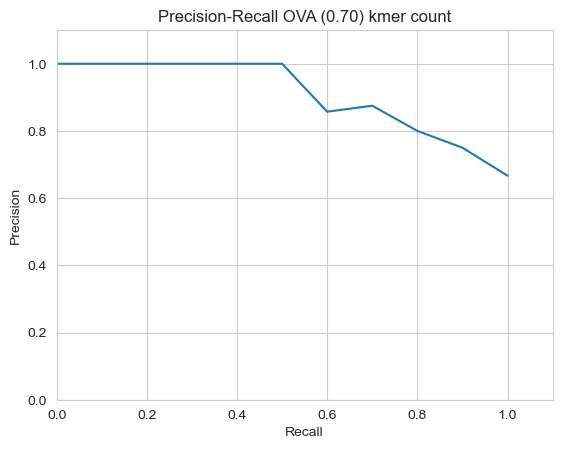

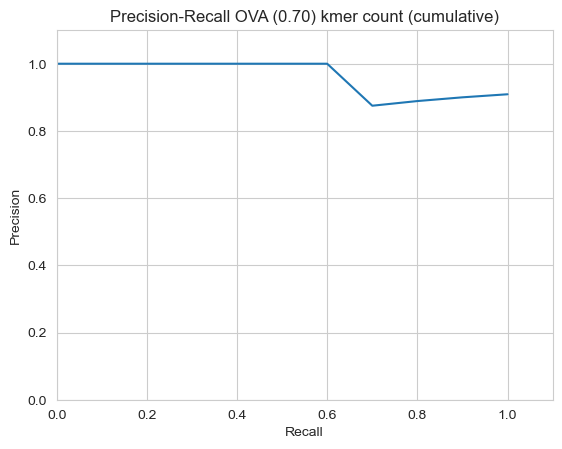

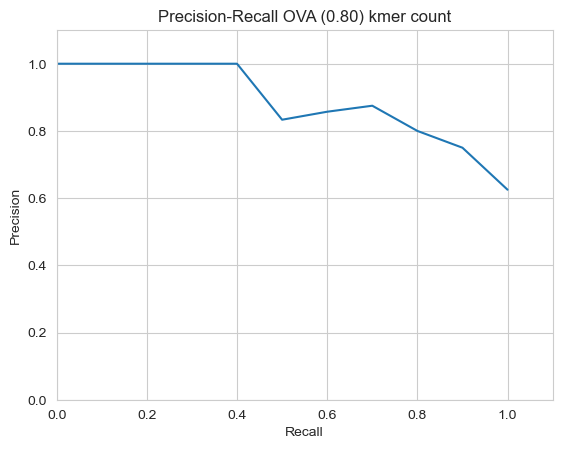

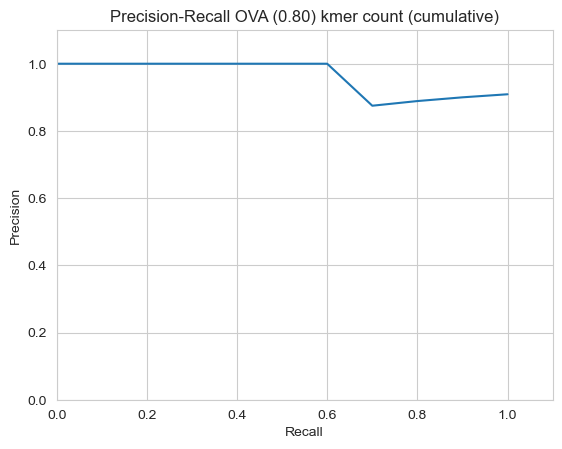

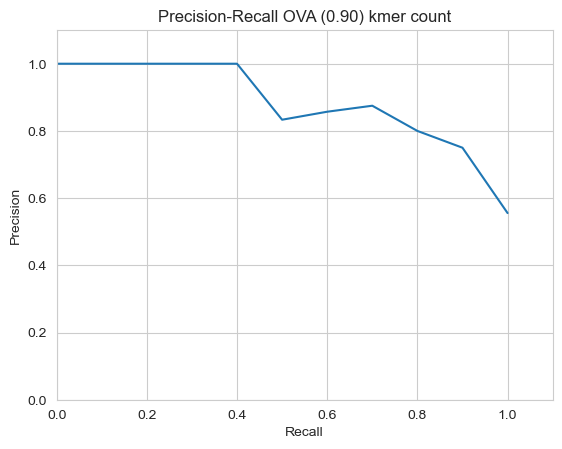

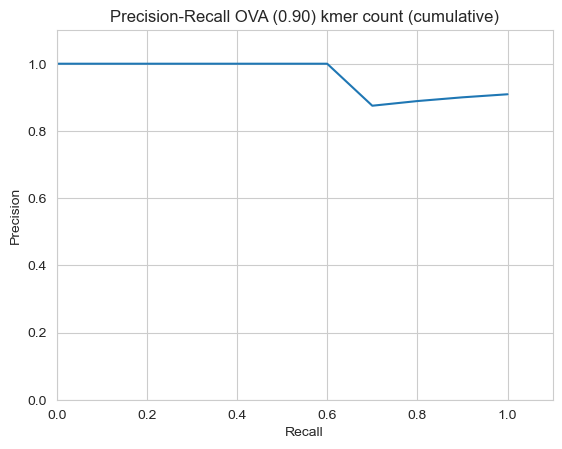

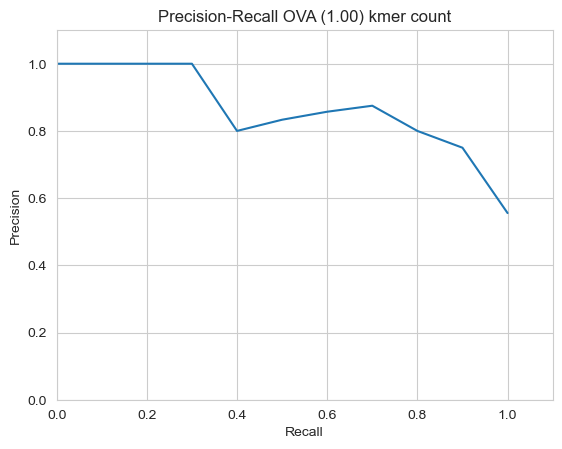

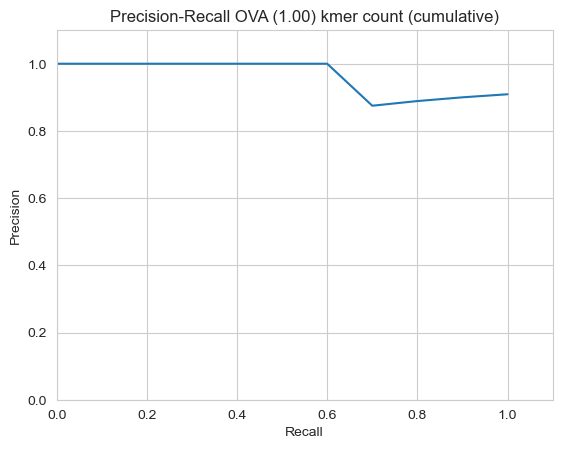

In [24]:
for column in data_kraken["column"].unique():
    for rank in ["species"]: # pr["rank"].unique()
        data = data_kraken[(data_kraken["column"] == column) & (data_kraken["rank"] == rank)]
        plt.plot(data["recall"], data["precision"], label=rank)
    plt.xlim(0, 1.1)
    plt.xlabel("Recall")
    plt.ylim(0, 1.1)
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall {column}")
    plt.show()